In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Project/Clickstream Project/Clickstream/Data/train_data.csv")

In [39]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [31]:
df.shape

(132379, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [33]:
df.isnull().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [11]:
df['country'].value_counts()

country
29    107173
9      14465
24      3272
46      1988
44      1130
16       632
21       622
34       584
41       539
3        193
27       190
12       166
42       141
37       133
31       121
10       120
22       116
28       116
38       114
15        96
11        90
25        54
2         49
32        40
14        35
23        34
19        24
39        24
43        23
17        17
18        15
36        12
7          9
20         8
45         6
47         5
5          4
30         4
6          3
33         3
1          3
35         2
8          1
26         1
13         1
4          1
Name: count, dtype: int64

In [16]:
df['page1_main_category'].value_counts()

page1_main_category
1    39891
4    30994
3    30911
2    30583
Name: count, dtype: int64

In [17]:
df['page2_clothing_model'].value_counts()

page2_clothing_model
B4     2824
A2     2389
A11    2247
P1     2134
B10    2011
       ... 
P31      64
P66      42
P79       2
P22       2
P54       1
Name: count, Length: 216, dtype: int64

In [20]:
df['colour'].value_counts()

colour
2     23840
3     23380
6     13966
4     13186
14    12795
9     10865
12     7082
1      6266
7      5474
13     5048
11     4161
10     2824
8      2146
5      1346
Name: count, dtype: int64

In [21]:
df['location'].value_counts()

location
1    27627
2    26610
5    22291
4    21936
3    17278
6    16637
Name: count, dtype: int64

In [22]:
df['model_photography'].value_counts()

model_photography
1    97957
2    34422
Name: count, dtype: int64

In [23]:
df['price_2'].value_counts()

price_2
1    67714
2    64665
Name: count, dtype: int64

In [24]:
df['page'].value_counts()

page
1    74637
2    32882
3    15470
4     7110
5     2280
Name: count, dtype: int64

In [5]:
df['session_id'].value_counts()

session_id
13846    164
22433    157
22902    136
8201     129
19623    113
        ... 
2453       1
20295      1
14469      1
9414       1
20149      1
Name: count, Length: 22910, dtype: int64

In [9]:
df['page2_clothing_model'].nunique()

216

In [3]:
#Categorical columns
cat = ['country',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography','price_2']

In [4]:
for i in cat:
    if df[i].dtypes == "int64":
        df[i]=df[i].astype('object')

In [5]:
# making seperate list for cat and num columns
# for intial stage i kept month, date, page columns as int.
cat=[]
num=[]

for i in df.columns:
    if df[i].dtypes == "object":
        cat.append(i)
    else:
        num.append(i)

print(cat)
print(num)

['country', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price_2']
['year', 'month', 'day', 'order', 'session_id', 'price', 'page']


In [6]:
df[cat].describe().T

,count,unique,top,freq
country,132379,46,29,107173
page1_main_category,132379,4,1,39891
page2_clothing_model,132379,216,B4,2824
colour,132379,14,2,23840
location,132379,6,1,27627
model_photography,132379,2,1,97957
price_2,132379,2,1,67714


In [38]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
year,132379.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
month,132379.0,5.582759,1.328064,4.0,4.0,5.0,7.0,8.0
day,132379.0,14.507671,8.829106,1.0,7.0,14.0,22.0,31.0
order,132379.0,9.811314,13.458937,1.0,2.0,6.0,12.0,195.0
session_id,132379.0,12038.722063,7012.460866,1.0,5905.0,11931.0,18212.0,24026.0
price,132379.0,43.788191,12.539390,18.0,33.0,43.0,52.0,82.0
page,132379.0,1.712137,0.983699,1.0,1.0,1.0,2.0,5.0


In [39]:
df.duplicated().sum()

0

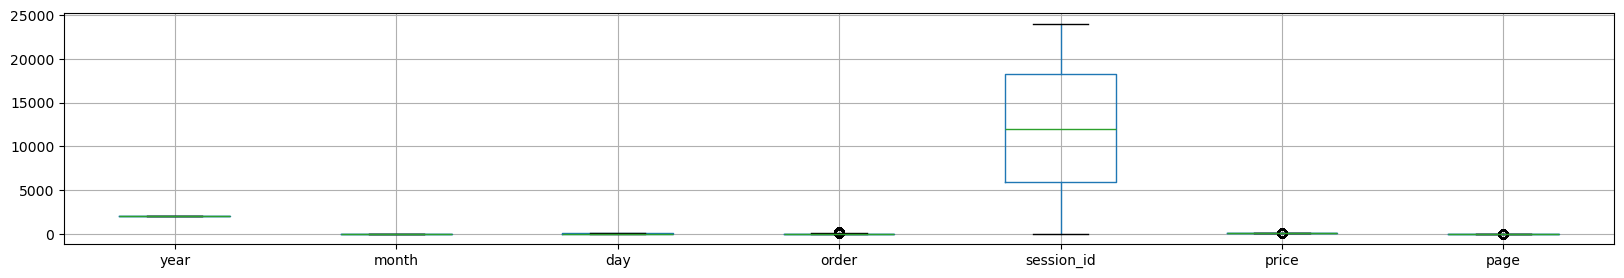

In [40]:
df.boxplot(figsize=(20,3))
plt.show()

In [1]:
#univarient analysis

In [7]:
def ploting(col, title, title1, row):
    
    a=sns.histplot(df[col], kde = True, ax=axes[row][0])

    a=sns.countplot(y=df[col], ax=axes[row][1])
    a.set_title(title1, fontsize=10)

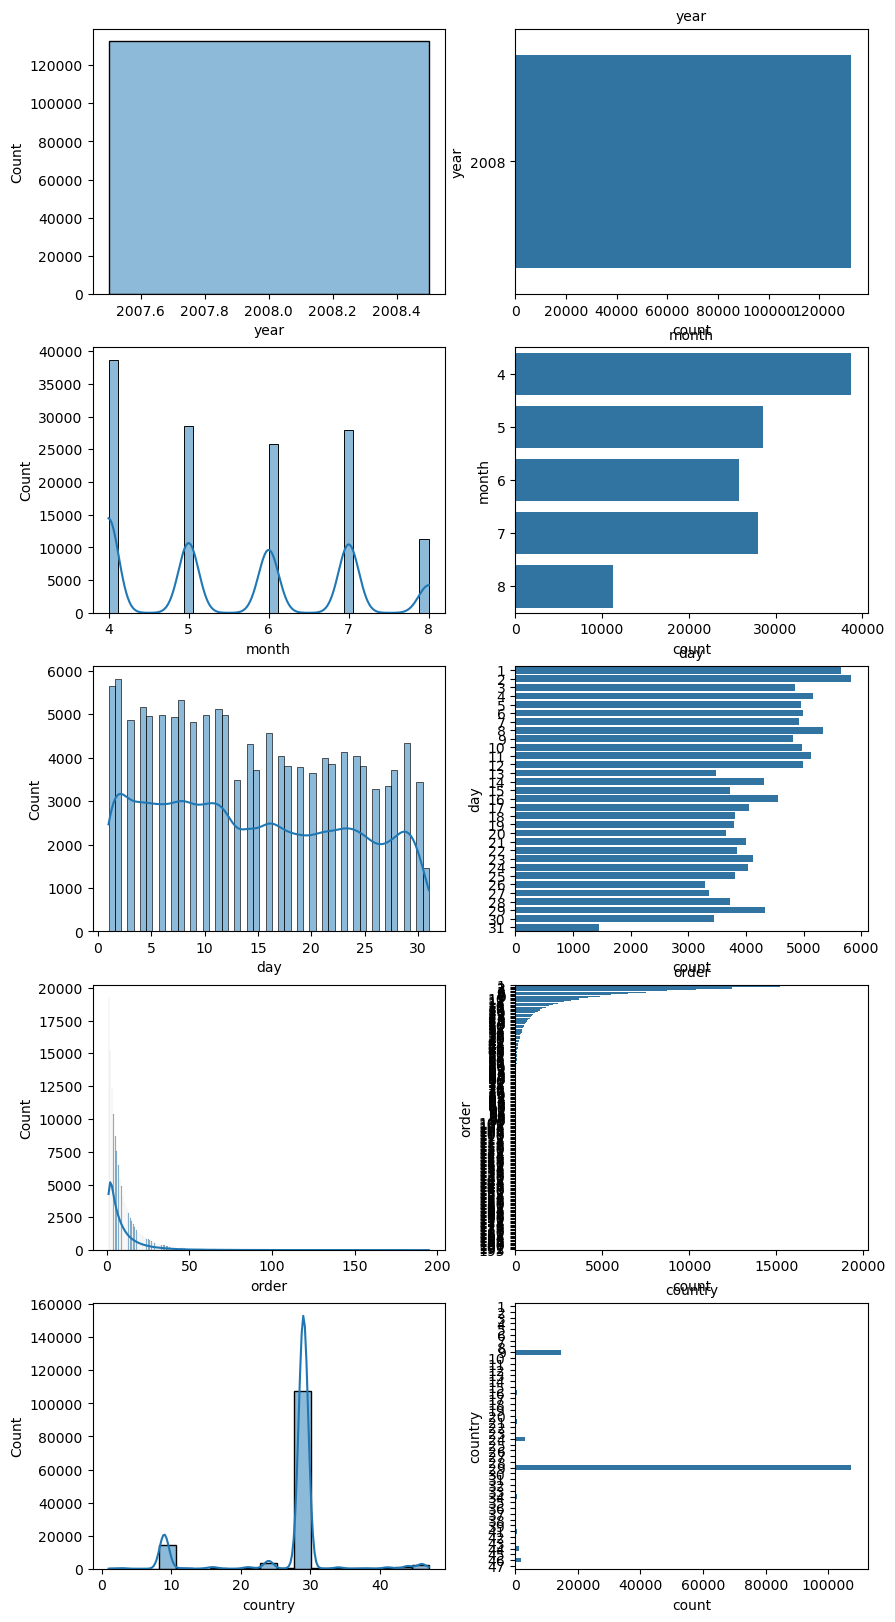

In [8]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
fig.set_size_inches(10,20)


col = ['year', 'month', 'day', 'order', 'country']
title = ['year distribution', 'month distribution', 'day distribution', 'order distribution', 'country distribution']
title1 = ['year', 'month', 'day', 'order', 'country']

for i in range(len(col)):
    ploting(col[i], title[i], title1[i], i)



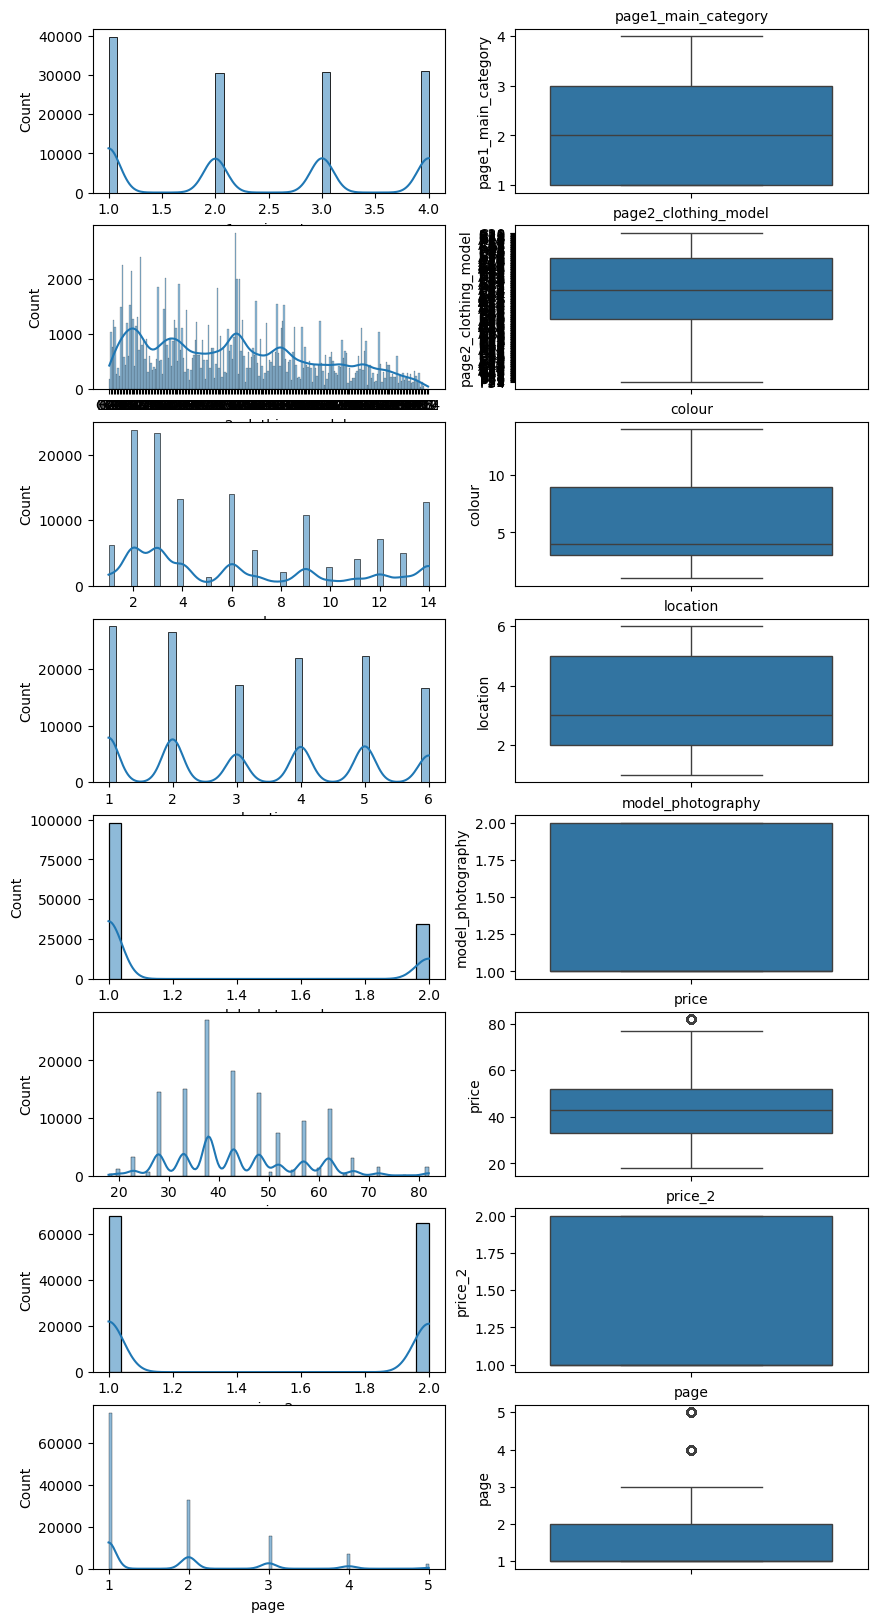

In [32]:
col = ['page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page']
title = ['page1 main category distribution ', 'page2_clothing_model distribution', 'colour distribution', 'location distribution',
       'model_photography distribution', 'price distribution', 'price_2 distribution', 'page distribution']
title1 = ['page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page']


fig, axes = plt.subplots(nrows = 8, ncols = 2)
fig.set_size_inches(10,20)

for i in range(len(col)):
    ploting(col[i], title[i], title1[i], i)

Text(0.5, 1.0, 'Price')

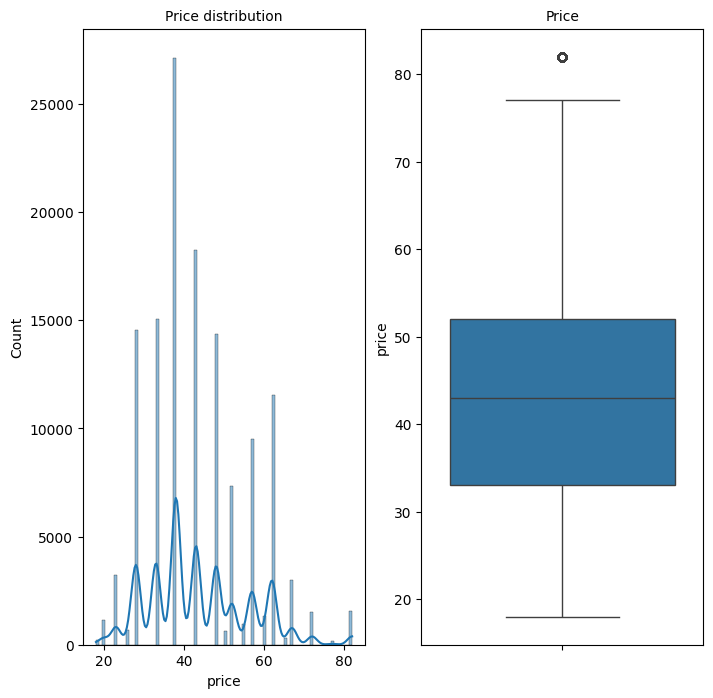

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(8,8)

a=sns.histplot(df['price'],kde = True, ax=axes[0])
a.set_title('Price distribution', fontsize=10)

a=sns.boxplot(df['price'], ax = axes[1])
a.set_title('Price', fontsize = 10)

In [42]:
df["price"].skew()

np.float64(0.5240675621436683)

In [10]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

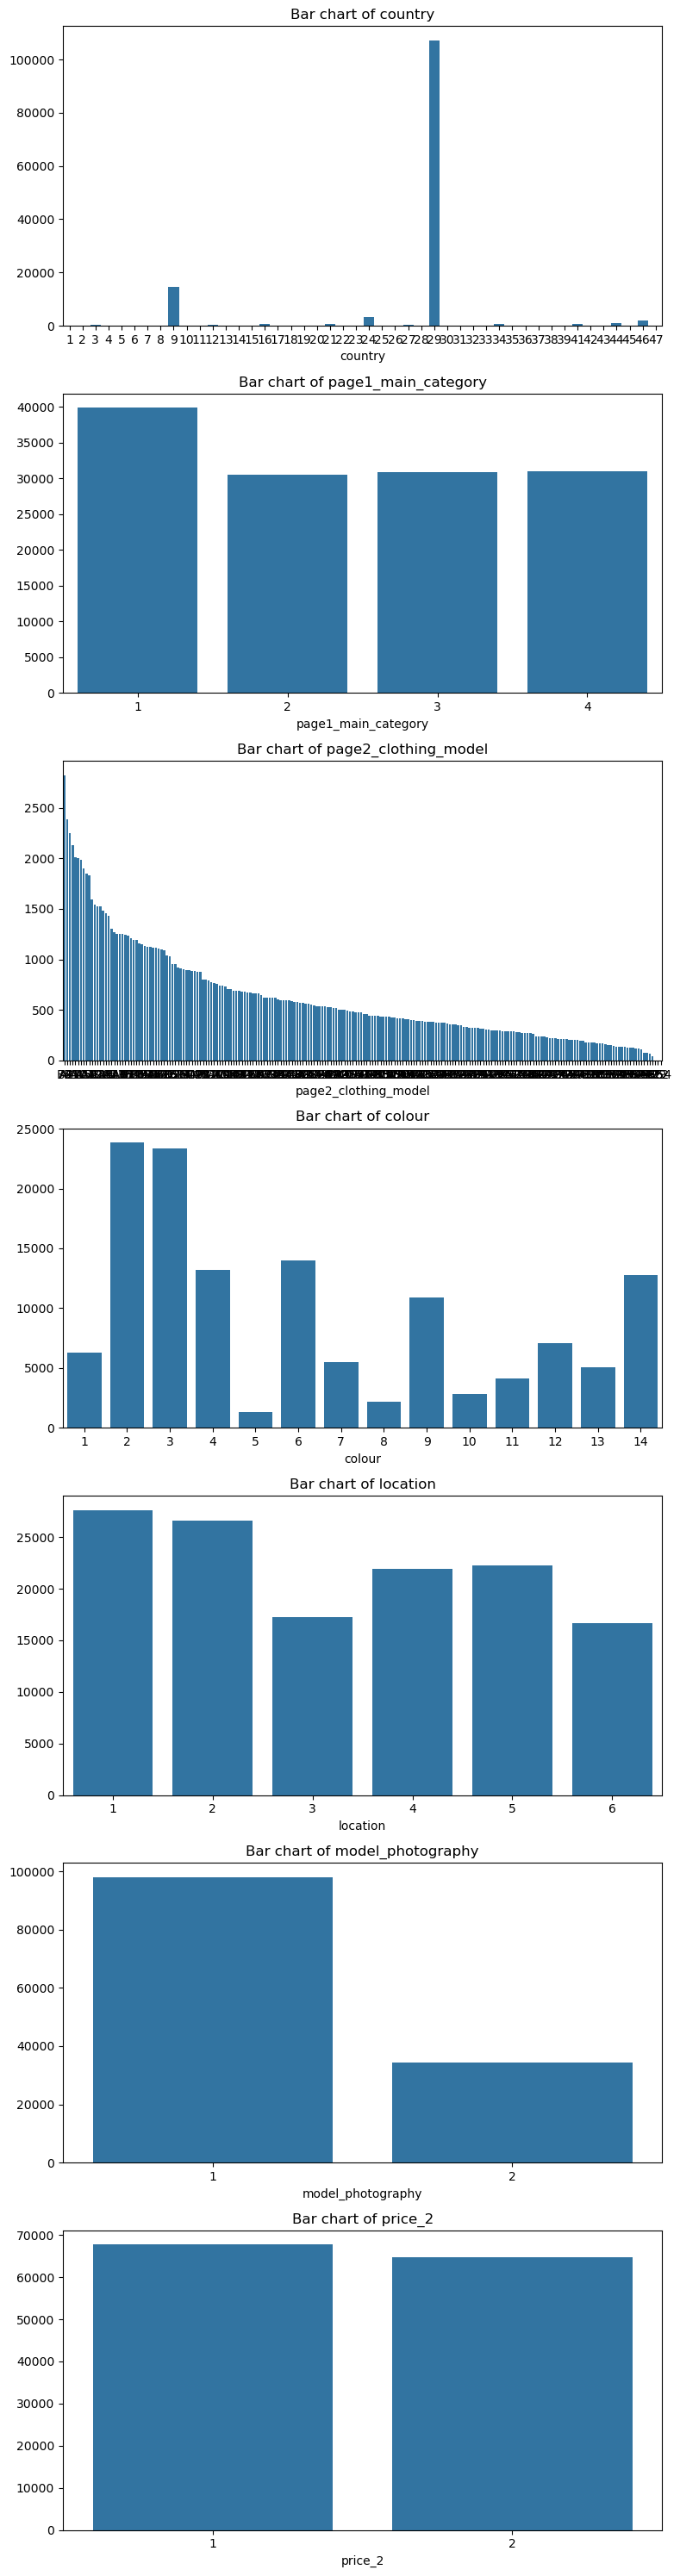

In [41]:
#categorical_columns = ['year', 'month', 'day', 'country',
      # 'page1_main_category', 'page2_clothing_model', 'colour', 'location',
      # 'model_photography','price_2', 'page']


fig, axes = plt.subplots(nrows=len(cat), ncols=1, figsize=(8,30))

for i,col in enumerate(cat):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Bar chart of {col}')

plt.tight_layout()
plt.show()

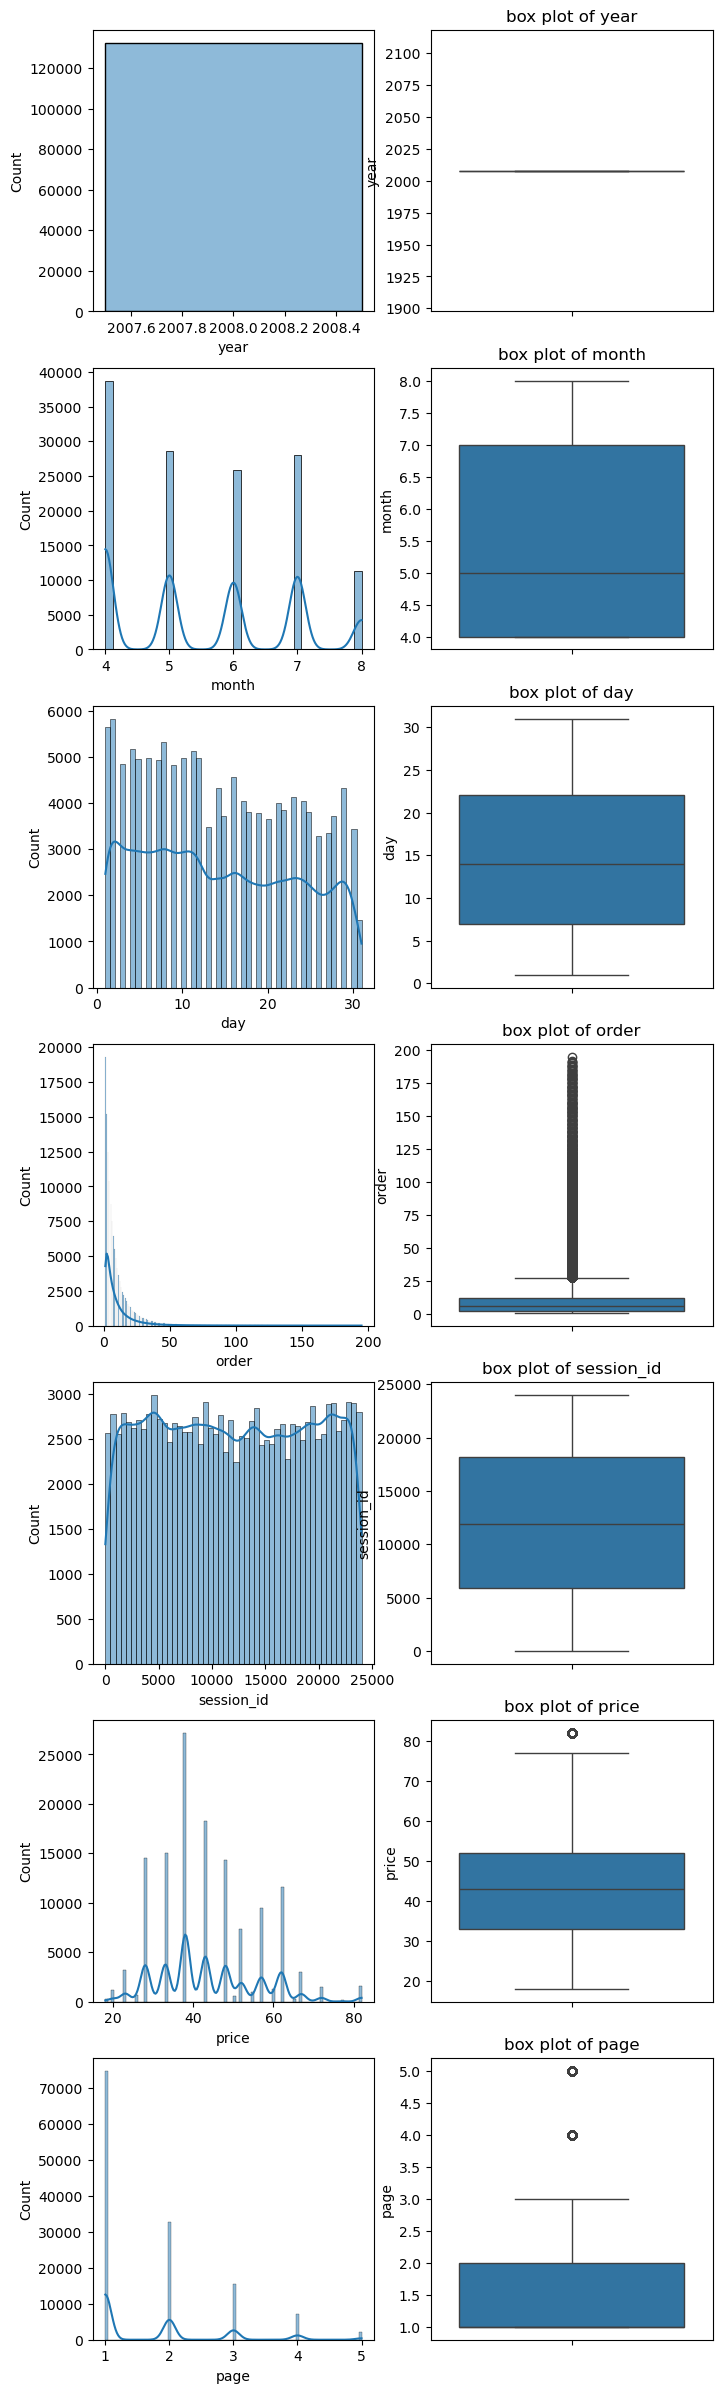

In [45]:
# for continuous column boxplot used

fig, axes = plt.subplots(nrows=len(num), ncols=2, figsize=(8,30))

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
for i,col in enumerate(num):
    sns.histplot(df[col], kde=True, ax=axes[i][0])
    
    sns.boxplot(y=df[col], ax=axes[i][1])
    axes[i][1].set_title(f'box plot of {col}')



plt.show()

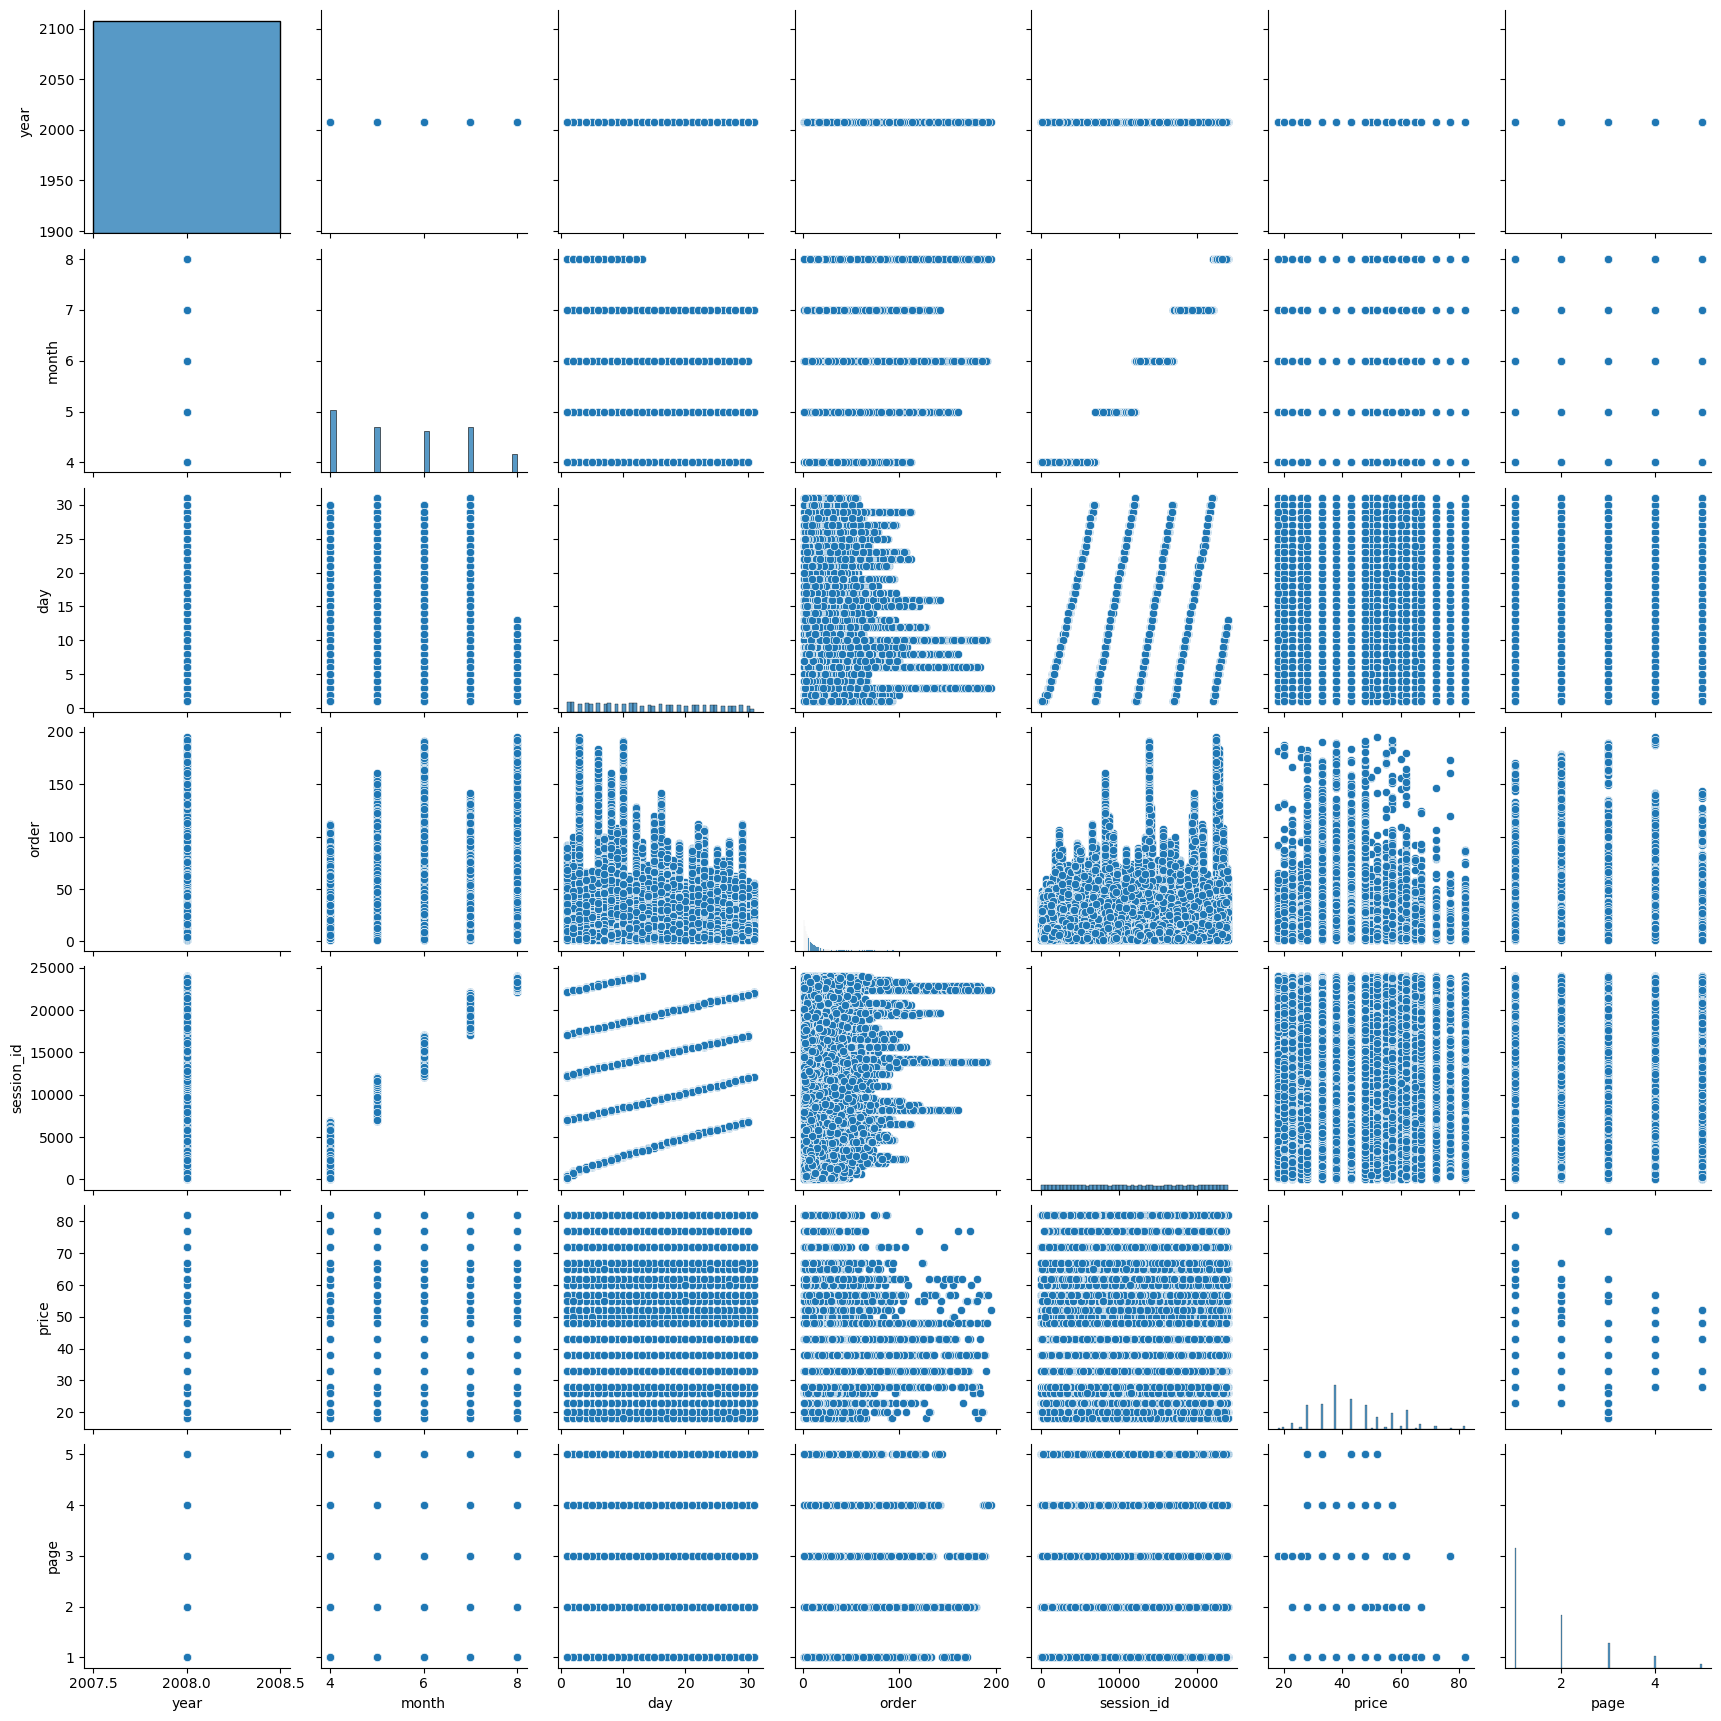

In [44]:
# pairplot to check relation between numerical variables

sns.pairplot(df[num])
plt.show()

In [15]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [21]:
df_col = df[['month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page']]

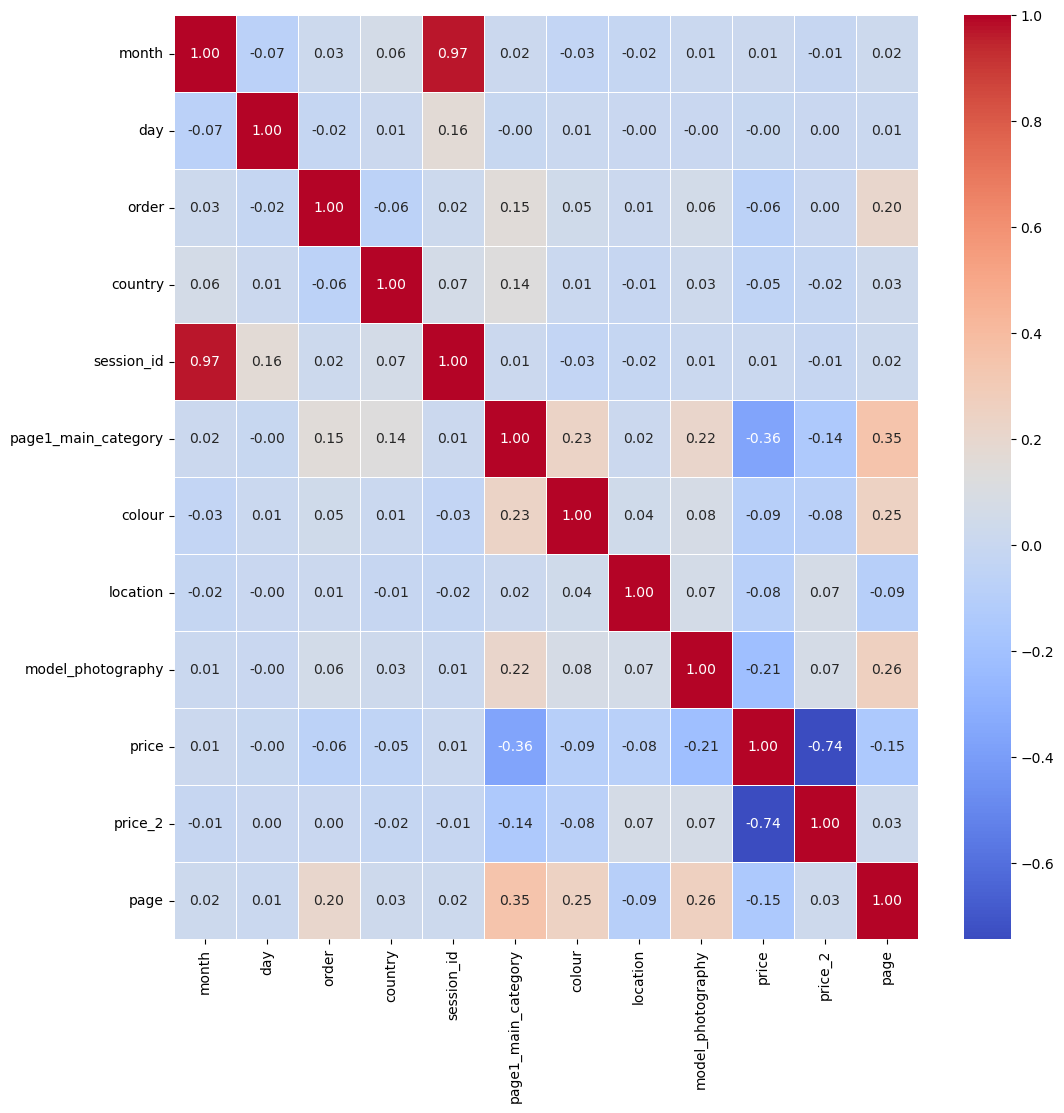

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df_col.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.show()

In [1]:
#Feature Engineering

In [178]:
#Sessions per day

df['date'] = pd.to_datetime(df[['year','month','day']],format = None, errors = 'coerce') 

sessions_per_day = df.groupby('date')['session_id'].nunique()
df['sessions_per_day'] = df['date'].map(sessions_per_day)

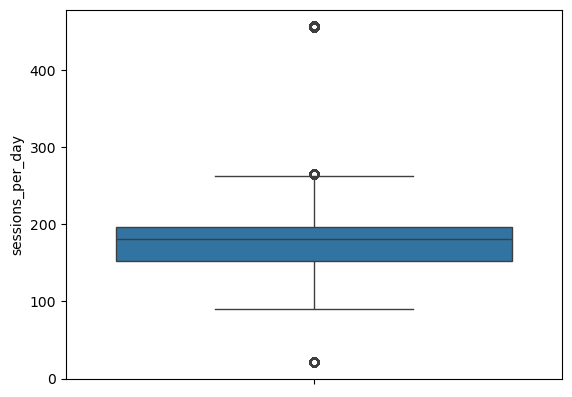

In [21]:
sns.boxplot(y=df['sessions_per_day'])
plt.show()

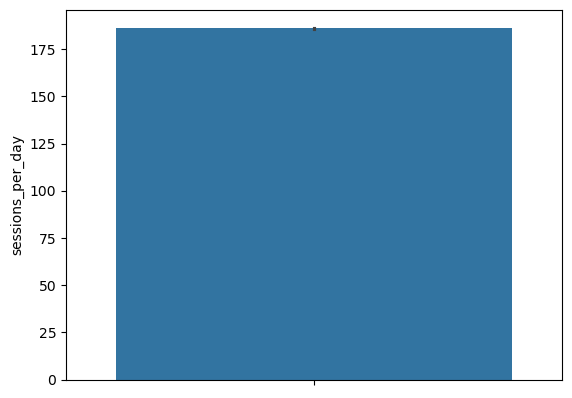

In [22]:
sns.barplot(y=df['sessions_per_day'])
plt.show()

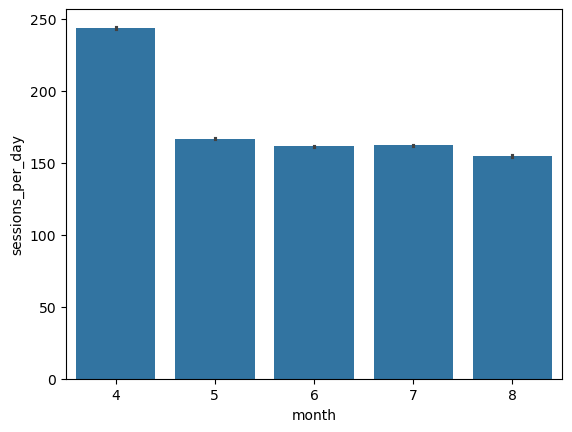

In [24]:
sns.barplot(x=df['month'], y=df['sessions_per_day'])
plt.show()

In [179]:
# page views

df['page_views_per_session_id'] = df.groupby('session_id')['page'].transform('count')

In [40]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,date,sessions_per_day,page_views,page_views_per_session_id
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2,2008-06-22,97,84,84
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2,2008-05-19,191,9,9
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1,2008-07-15,183,10,10
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1,2008-05-02,131,6,6
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2,2008-06-09,177,15,15


In [180]:
# Bounce Rates

df['is_bounce'] = df['page_views_per_session_id'] == 1

total_sessions = df['session_id'].nunique()
bounce_sessions = df['is_bounce'].sum()

bounce_rate = (bounce_sessions/total_sessions)*100
print(f'Bounce Rate: {bounce_rate:.2f}%')

Bounce Rate: 23.72%


In [45]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,date,sessions_per_day,page_views,page_views_per_session_id,is_bounce
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2,2008-06-22,97,84,84,False
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2,2008-05-19,191,9,9,False
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1,2008-07-15,183,10,10,False
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1,2008-05-02,131,6,6,False
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2,2008-06-09,177,15,15,False


In [181]:
# revisit
df['is_revisit'] = df.groupby('session_id').cumcount()>0


In [48]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,date,sessions_per_day,page_views,page_views_per_session_id,is_bounce,is_revisit
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2,2008-06-22,97,84,84,False,False
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2,2008-05-19,191,9,9,False,False
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1,2008-07-15,183,10,10,False,False
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1,2008-05-02,131,6,6,False,False
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2,2008-06-09,177,15,15,False,False


In [182]:
#Exit rates

df['is_exit'] = df.groupby('session_id').cumcount() == df.groupby('session_id')['session_id'].transform('count') - 1

df['exit_rate'] = round(df.groupby('session_id')['is_exit'].sum()/df.groupby('session_id')['session_id'].transform('count'),2)

In [58]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,price_2,page,date,sessions_per_day,page_views,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate
0,2008,6,22,21,29,15648,3,C20,13,1,...,1,2,2008-06-22,97,84,84,False,False,False,NaN
1,2008,5,19,6,29,10018,2,B26,13,3,...,1,2,2008-05-19,191,9,9,False,False,False,0.11
2,2008,7,15,2,29,19388,3,C13,9,5,...,1,1,2008-07-15,183,10,10,False,False,False,0.10
3,2008,5,2,2,29,7181,2,B11,2,4,...,2,1,2008-05-02,131,6,6,False,False,False,0.17
4,2008,6,9,16,29,13493,2,B31,9,5,...,1,2,2008-06-09,177,15,15,False,False,False,0.07


In [183]:
df['exit_rate'] = df['exit_rate'].fillna(0)

In [60]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,price_2,page,date,sessions_per_day,page_views,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate
0,2008,6,22,21,29,15648,3,C20,13,1,...,1,2,2008-06-22,97,84,84,False,False,False,0.00
1,2008,5,19,6,29,10018,2,B26,13,3,...,1,2,2008-05-19,191,9,9,False,False,False,0.11
2,2008,7,15,2,29,19388,3,C13,9,5,...,1,1,2008-07-15,183,10,10,False,False,False,0.10
3,2008,5,2,2,29,7181,2,B11,2,4,...,2,1,2008-05-02,131,6,6,False,False,False,0.17
4,2008,6,9,16,29,13493,2,B31,9,5,...,1,2,2008-06-09,177,15,15,False,False,False,0.07


In [184]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

In [67]:
df['day_of_week'].value_counts()

day_of_week
1    22919
2    22425
3    20260
0    20212
4    18121
6    15035
5    13407
Name: count, dtype: int64

In [68]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,date,sessions_per_day,page_views,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,hour_of_day,day_of_week
0,2008,6,22,21,29,15648,3,C20,13,1,...,2008-06-22,97,84,84,False,False,False,0.00,0,6
1,2008,5,19,6,29,10018,2,B26,13,3,...,2008-05-19,191,9,9,False,False,False,0.11,0,0
2,2008,7,15,2,29,19388,3,C13,9,5,...,2008-07-15,183,10,10,False,False,False,0.10,0,1
3,2008,5,2,2,29,7181,2,B11,2,4,...,2008-05-02,131,6,6,False,False,False,0.17,0,4
4,2008,6,9,16,29,13493,2,B31,9,5,...,2008-06-09,177,15,15,False,False,False,0.07,0,0


In [185]:
# time spent per product category

df['time_spent_per_category'] = df.groupby(['session_id', 'page1_main_category'])['page'].transform('count')

In [72]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,sessions_per_day,page_views,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,hour_of_day,day_of_week,time_spent_per_category
0,2008,6,22,21,29,15648,3,C20,13,1,...,97,84,84,False,False,False,0.00,0,6,36
1,2008,5,19,6,29,10018,2,B26,13,3,...,191,9,9,False,False,False,0.11,0,0,7
2,2008,7,15,2,29,19388,3,C13,9,5,...,183,10,10,False,False,False,0.10,0,1,5
3,2008,5,2,2,29,7181,2,B11,2,4,...,131,6,6,False,False,False,0.17,0,4,5
4,2008,6,9,16,29,13493,2,B31,9,5,...,177,15,15,False,False,False,0.07,0,0,14


In [186]:
# numer of clicks

df['total_clicks_per_session_id'] = df.groupby('session_id')['order'].transform('max')

In [75]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,page_views,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,hour_of_day,day_of_week,time_spent_per_category,total_clicks_per_session_id
0,2008,6,22,21,29,15648,3,C20,13,1,...,84,84,False,False,False,0.00,0,6,36,107
1,2008,5,19,6,29,10018,2,B26,13,3,...,9,9,False,False,False,0.11,0,0,7,13
2,2008,7,15,2,29,19388,3,C13,9,5,...,10,10,False,False,False,0.10,0,1,5,11
3,2008,5,2,2,29,7181,2,B11,2,4,...,6,6,False,False,False,0.17,0,4,5,8
4,2008,6,9,16,29,13493,2,B31,9,5,...,15,15,False,False,False,0.07,0,0,14,17


In [187]:
# track click sequence

df=df.sort_values(by=['session_id','order'])
df['browsing_path'] = df.groupby('session_id')['page2_clothing_model'].transform(lambda x: '->'.join(x.astype(str)))

In [79]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,hour_of_day,day_of_week,time_spent_per_category,total_clicks_per_session_id,browsing_path
65217,2008,4,1,2,29,1,1,A16,1,6,...,8,False,True,False,0.00,0,1,1,9,A16->B4->B17->B8->C56->C57->P67->P82
94740,2008,4,1,3,29,1,2,B4,10,2,...,8,False,True,False,0.00,0,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
37541,2008,4,1,4,29,1,2,B17,6,6,...,8,False,True,False,0.00,0,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
1304,2008,4,1,5,29,1,2,B8,4,3,...,8,False,False,False,0.12,0,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
119700,2008,4,1,6,29,1,3,C56,6,1,...,8,False,True,True,0.00,0,1,2,9,A16->B4->B17->B8->C56->C57->P67->P82


In [14]:
df.shape

(132379, 25)

In [56]:
df.dtypes

year                                    int64
month                                   int64
day                                     int64
order                                   int64
country                                object
session_id                              int64
page1_main_category                    object
page2_clothing_model                   object
colour                                 object
location                               object
model_photography                      object
price                                   int64
price_2                                object
page                                    int64
date                           datetime64[ns]
sessions_per_day                        int64
page_views_per_session_id               int64
is_bounce                                bool
is_revisit                               bool
is_exit                                  bool
exit_rate                             float64
day_of_week                       

In [188]:
for i in df.columns:
    if df[i].dtypes == "bool":
        df[i] = df[i].astype('int64')
    

In [58]:
df.dtypes

year                                    int64
month                                   int64
day                                     int64
order                                   int64
country                                object
session_id                              int64
page1_main_category                    object
page2_clothing_model                   object
colour                                 object
location                               object
model_photography                      object
price                                   int64
price_2                                object
page                                    int64
date                           datetime64[ns]
sessions_per_day                        int64
page_views_per_session_id               int64
is_bounce                               int64
is_revisit                              int64
is_exit                                 int64
exit_rate                             float64
day_of_week                       

In [59]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,day_of_week,time_spent_per_category,total_clicks_per_session_id,browsing_path
65217,2008,4,1,2,29,1,1,A16,1,6,...,456,8,0,1,0,0.00,1,1,9,A16->B4->B17->B8->C56->C57->P67->P82
94740,2008,4,1,3,29,1,2,B4,10,2,...,456,8,0,1,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
37541,2008,4,1,4,29,1,2,B17,6,6,...,456,8,0,1,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
1304,2008,4,1,5,29,1,2,B8,4,3,...,456,8,0,0,0,0.12,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
119700,2008,4,1,6,29,1,3,C56,6,1,...,456,8,0,1,1,0.00,1,2,9,A16->B4->B17->B8->C56->C57->P67->P82


In [189]:
df.to_csv('train dataset with feature engineering.csv', index=False)

In [2]:
df = pd.read_csv("C:/Users/loges/clickstream/train dataset with feature engineering.csv")

In [3]:
df.shape

(132379, 25)

In [4]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,is_exit,exit_rate,day_of_week,time_spent_per_category,total_clicks_per_session_id,browsing_path
0,2008,4,1,2,29,1,1,A16,1,6,...,456,8,0,1,0,0.00,1,1,9,A16->B4->B17->B8->C56->C57->P67->P82
1,2008,4,1,3,29,1,2,B4,10,2,...,456,8,0,1,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
2,2008,4,1,4,29,1,2,B17,6,6,...,456,8,0,1,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
3,2008,4,1,5,29,1,2,B8,4,3,...,456,8,0,0,0,0.12,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82
4,2008,4,1,6,29,1,3,C56,6,1,...,456,8,0,1,1,0.00,1,2,9,A16->B4->B17->B8->C56->C57->P67->P82


In [5]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page', 'date',
       'sessions_per_day', 'page_views_per_session_id', 'is_bounce',
       'is_revisit', 'is_exit', 'exit_rate', 'day_of_week',
       'time_spent_per_category', 'total_clicks_per_session_id',
       'browsing_path'],
      dtype='object')

In [6]:
df.dtypes

year                             int64
month                            int64
day                              int64
order                            int64
country                          int64
session_id                       int64
page1_main_category              int64
page2_clothing_model            object
colour                           int64
location                         int64
model_photography                int64
price                            int64
price_2                          int64
page                             int64
date                            object
sessions_per_day                 int64
page_views_per_session_id        int64
is_bounce                        int64
is_revisit                       int64
is_exit                          int64
exit_rate                      float64
day_of_week                      int64
time_spent_per_category          int64
total_clicks_per_session_id      int64
browsing_path                   object
dtype: object

In [ ]:
#Encoding part


In [7]:
cat = ['country','page1_main_category','page2_clothing_model','colour','model_photography','price_2','browsing_path']

In [8]:
for col in cat:
    df[col] = df[col].astype('object')


In [9]:
df.dtypes

year                             int64
month                            int64
day                              int64
order                            int64
country                         object
session_id                       int64
page1_main_category             object
page2_clothing_model            object
colour                          object
location                         int64
model_photography               object
price                            int64
price_2                         object
page                             int64
date                            object
sessions_per_day                 int64
page_views_per_session_id        int64
is_bounce                        int64
is_revisit                       int64
is_exit                          int64
exit_rate                      float64
day_of_week                      int64
time_spent_per_category          int64
total_clicks_per_session_id      int64
browsing_path                   object
dtype: object

In [10]:
for i in cat:
    print(f'unique value of {i} is: {df[i].nunique()}')

unique value of country is: 46
unique value of page1_main_category is: 4
unique value of page2_clothing_model is: 216
unique value of colour is: 14
unique value of model_photography is: 2
unique value of price_2 is: 2
unique value of browsing_path is: 16519


In [11]:
df[cat].head()

,country,page1_main_category,page2_clothing_model,colour,model_photography,price_2,browsing_path
0,29,1,A16,1,1,2,A16->B4->B17->B8->C56->C57->P67->P82
1,29,2,B4,10,1,1,A16->B4->B17->B8->C56->C57->P67->P82
2,29,2,B17,6,2,2,A16->B4->B17->B8->C56->C57->P67->P82
3,29,2,B8,4,2,1,A16->B4->B17->B8->C56->C57->P67->P82
4,29,3,C56,6,2,1,A16->B4->B17->B8->C56->C57->P67->P82


In [12]:
cat_x  = ['country','page1_main_category','page2_clothing_model','colour','model_photography','browsing_path']

In [30]:
# chi-square test to check if there is any relation between the cal column and target column.

from scipy.stats import chi2_contingency

for col in cat_x:  # cat is the list of categorical features
    contingency_table = pd.crosstab(df[col], df['price_2'])  # Replace 'price_2' with your target column
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    if p_value < 0.05:
        print(f"Significant relationship between {col} and price_2 (p-value: {p_value})")
    else:
        print(f"No significant relationship between {col} and price_2 (p-value: {p_value})")

Significant relationship between country and price_2 (p-value: 7.763718099112759e-06)
Significant relationship between page1_main_category and price_2 (p-value: 0.0)
Significant relationship between page2_clothing_model and price_2 (p-value: 0.0)
Significant relationship between colour and price_2 (p-value: 0.0)
Significant relationship between model_photography and price_2 (p-value: 1.2297123557266778e-158)
Significant relationship between browsing_path and price_2 (p-value: 0.0)


In [32]:
# Since the page2 clothing model has more no of distnict values, grouped them into 4 groups based on the category


# Extract the first letter of each value in 'page2_clothing_model'
df['page2_grouped'] = df['page2_clothing_model'].str[0]

# Optional: You can add a custom mapping if you want to group specific letters into categories
# For example, if you want to group all 'A' as Category 1, all 'B' as Category 2, etc.
df['page2_grouped'] = df['page2_grouped'].map({
    'A': 'Category 1',
    'B': 'Category 2',
    'C': 'Category 3',
    # Add more mappings as necessary
}).fillna('Other')  # For any other letters that aren't mapped, you can group them as 'Other'

# Now apply one-hot encoding to the 'page2_grouped' column
df_encoded = pd.get_dummies(df, columns=['page2_grouped'])


In [33]:
df_encoded.shape

(132379, 29)

In [87]:
df_encoded.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,is_exit,exit_rate,day_of_week,time_spent_per_category,total_clicks_per_session_id,browsing_path,page2_grouped_Category 1,page2_grouped_Category 2,page2_grouped_Category 3,page2_grouped_Other
0,2008,4,1,2,29,1,1,A16,1,6,...,0,0.00,1,1,9,A16->B4->B17->B8->C56->C57->P67->P82,True,False,False,False
1,2008,4,1,3,29,1,2,B4,10,2,...,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82,False,True,False,False
2,2008,4,1,4,29,1,2,B17,6,6,...,0,0.00,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82,False,True,False,False
3,2008,4,1,5,29,1,2,B8,4,3,...,0,0.12,1,3,9,A16->B4->B17->B8->C56->C57->P67->P82,False,True,False,False
4,2008,4,1,6,29,1,3,C56,6,1,...,1,0.00,1,2,9,A16->B4->B17->B8->C56->C57->P67->P82,False,False,True,False


In [34]:
print(df_encoded[['price_2', 'page2_grouped_Category 1','page2_grouped_Category 2','page2_grouped_Category 3','page2_grouped_Other',]].corr())

                           price_2  page2_grouped_Category 1  \
price_2                   1.000000                  0.223117   
page2_grouped_Category 1  0.223117                  1.000000   
page2_grouped_Category 2 -0.142013                 -0.359971   
page2_grouped_Category 3 -0.065031                 -0.362489   
page2_grouped_Other      -0.035440                 -0.363124   

                          page2_grouped_Category 2  page2_grouped_Category 3  \
price_2                                  -0.142013                 -0.065031   
page2_grouped_Category 1                 -0.359971                 -0.362489   
page2_grouped_Category 2                  1.000000                 -0.302522   
page2_grouped_Category 3                 -0.302522                  1.000000   
page2_grouped_Other                      -0.303052                 -0.305171   

                          page2_grouped_Other  
price_2                             -0.035440  
page2_grouped_Category 1            -0

In [91]:
df_encoded['country'].value_counts()

country
29    107173
9      14465
24      3272
46      1988
44      1130
16       632
21       622
34       584
41       539
3        193
27       190
12       166
42       141
37       133
31       121
10       120
22       116
28       116
38       114
15        96
11        90
25        54
2         49
32        40
14        35
23        34
19        24
39        24
43        23
17        17
18        15
36        12
7          9
20         8
45         6
47         5
5          4
30         4
6          3
1          3
33         3
35         2
13         1
4          1
26         1
8          1
Name: count, dtype: int64

In [92]:
df_encoded['colour'].value_counts()

colour
2     23840
3     23380
6     13966
4     13186
14    12795
9     10865
12     7082
1      6266
7      5474
13     5048
11     4161
10     2824
8      2146
5      1346
Name: count, dtype: int64

In [35]:
# for country and colour values with less counts are grouped to other groups.

# Sample dataframe (replace with your actual dataframe)
# df = pd.read_csv("your_dataset.csv")

# Step 1: Calculate the frequency of categories
country_counts = df['country'].value_counts()
colour_counts = df['colour'].value_counts()

# Step 2: Define a threshold for rare categories 
country_threshold = 200
colour_threshold = 7100

# Step 3: Identify rare categories and map them to "Other"
df_encoded['country'] = df_encoded['country'].apply(lambda x: x if country_counts[x] >= country_threshold else 'Other')
df_encoded['colour'] = df_encoded['colour'].apply(lambda x: x if colour_counts[x] >= colour_threshold else 'Other')

# Step 4: One-Hot Encoding for country and colour columns
df_encoded = pd.get_dummies(df_encoded, columns=['country', 'colour'], drop_first=True)




In [38]:
df_encoded.shape

(132379, 42)

In [36]:
df_encoded.head()

,year,month,day,order,session_id,page1_main_category,page2_clothing_model,location,model_photography,price,...,country_41,country_44,country_46,country_Other,colour_3,colour_4,colour_6,colour_9,colour_14,colour_Other
0,2008,4,1,2,1,1,A16,6,1,33,...,False,False,False,False,False,False,False,False,False,True
1,2008,4,1,3,1,2,B4,2,1,52,...,False,False,False,False,False,False,False,False,False,True
2,2008,4,1,4,1,2,B17,6,2,38,...,False,False,False,False,False,False,True,False,False,False
3,2008,4,1,5,1,2,B8,3,2,52,...,False,False,False,False,False,True,False,False,False,False
4,2008,4,1,6,1,3,C56,1,2,57,...,False,False,False,False,False,False,True,False,False,False


In [39]:
# one hot encoding for remaining columns
df_encoded = pd.get_dummies(df_encoded, columns=['location', 'model_photography',  'page1_main_category'], drop_first=True)

In [40]:
df_encoded.shape

(132379, 48)

In [41]:
df_encoded.columns

Index(['year', 'month', 'day', 'order', 'session_id', 'page2_clothing_model',
       'price', 'price_2', 'page', 'date', 'sessions_per_day',
       'page_views_per_session_id', 'is_bounce', 'is_revisit', 'is_exit',
       'exit_rate', 'day_of_week', 'time_spent_per_category',
       'total_clicks_per_session_id', 'browsing_path',
       'page2_grouped_Category 1', 'page2_grouped_Category 2',
       'page2_grouped_Category 3', 'page2_grouped_Other', 'country_16',
       'country_21', 'country_24', 'country_29', 'country_34', 'country_41',
       'country_44', 'country_46', 'country_Other', 'colour_3', 'colour_4',
       'colour_6', 'colour_9', 'colour_14', 'colour_Other', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6',
       'model_photography_2', 'page1_main_category_2', 'page1_main_category_3',
       'page1_main_category_4'],
      dtype='object')

In [42]:
df_encoded[['total_clicks_per_session_id', 'browsing_path']].head()

,total_clicks_per_session_id,browsing_path
0,9,A16->B4->B17->B8->C56->C57->P67->P82
1,9,A16->B4->B17->B8->C56->C57->P67->P82
2,9,A16->B4->B17->B8->C56->C57->P67->P82
3,9,A16->B4->B17->B8->C56->C57->P67->P82
4,9,A16->B4->B17->B8->C56->C57->P67->P82


In [65]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         132379 non-null  int64  
 1   month                        132379 non-null  int64  
 2   day                          132379 non-null  int64  
 3   order                        132379 non-null  int64  
 4   session_id                   132379 non-null  int64  
 5   page2_clothing_model         132379 non-null  object 
 6   price                        132379 non-null  int64  
 7   price_2                      132379 non-null  object 
 8   page                         132379 non-null  int64  
 9   date                         132379 non-null  object 
 10  sessions_per_day             132379 non-null  int64  
 11  page_views_per_session_id    132379 non-null  int64  
 12  is_bounce                    132379 non-null  int64  
 13 

In [43]:
# browsing path column has categorical values i create Features from that column and then do frequency encoding.

# path Lenght column

df_encoded['path_length'] = df_encoded['browsing_path'].str.count('->')+1

# first Page

df_encoded['first_page'] = df_encoded['browsing_path'].str.split('->').str[0]

# last page

df_encoded['last_page'] = df_encoded['browsing_path'].str.split('->').str[-1]



In [44]:
# frequency encoding for first and last page columns

for col in ['first_page', 'last_page']:
    freq_encoding = df_encoded[col].value_counts(normalize = True)
    df_encoded[col + '_freq'] = df_encoded[col].map(freq_encoding)

In [45]:
df_encoded.head()

,year,month,day,order,session_id,page2_clothing_model,price,price_2,page,date,...,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page,last_page,first_page_freq,last_page_freq
0,2008,4,1,2,1,A16,33,2,1,2008-04-01,...,True,False,False,False,False,8,A16,P82,0.012351,0.019323
1,2008,4,1,3,1,B4,52,1,1,2008-04-01,...,False,False,True,False,False,8,A16,P82,0.012351,0.019323
2,2008,4,1,4,1,B17,38,2,1,2008-04-01,...,True,True,True,False,False,8,A16,P82,0.012351,0.019323
3,2008,4,1,5,1,B8,52,1,1,2008-04-01,...,False,True,True,False,False,8,A16,P82,0.012351,0.019323
4,2008,4,1,6,1,C56,57,1,4,2008-04-01,...,False,True,False,True,False,8,A16,P82,0.012351,0.019323


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         132379 non-null  int64  
 1   month                        132379 non-null  int64  
 2   day                          132379 non-null  int64  
 3   order                        132379 non-null  int64  
 4   session_id                   132379 non-null  int64  
 5   page2_clothing_model         132379 non-null  object 
 6   price                        132379 non-null  int64  
 7   price_2                      132379 non-null  object 
 8   page                         132379 non-null  int64  
 9   date                         132379 non-null  object 
 10  sessions_per_day             132379 non-null  int64  
 11  page_views_per_session_id    132379 non-null  int64  
 12  is_bounce                    132379 non-null  int64  
 13 

In [47]:
df_encoded.head()

,year,month,day,order,session_id,page2_clothing_model,price,price_2,page,date,...,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page,last_page,first_page_freq,last_page_freq
0,2008,4,1,2,1,A16,33,2,1,2008-04-01,...,True,False,False,False,False,8,A16,P82,0.012351,0.019323
1,2008,4,1,3,1,B4,52,1,1,2008-04-01,...,False,False,True,False,False,8,A16,P82,0.012351,0.019323
2,2008,4,1,4,1,B17,38,2,1,2008-04-01,...,True,True,True,False,False,8,A16,P82,0.012351,0.019323
3,2008,4,1,5,1,B8,52,1,1,2008-04-01,...,False,True,True,False,False,8,A16,P82,0.012351,0.019323
4,2008,4,1,6,1,C56,57,1,4,2008-04-01,...,False,True,False,True,False,8,A16,P82,0.012351,0.019323


In [107]:
df_encoded.nunique()

year                               1
month                              5
day                               31
order                            193
session_id                     22910
page2_clothing_model             216
price                             20
price_2                            2
page                               5
date                             135
sessions_per_day                  83
page_views_per_session_id         87
is_bounce                          2
is_revisit                         2
is_exit                            2
exit_rate                         20
day_of_week                        7
time_spent_per_category           58
total_clicks_per_session_id      101
browsing_path                  16519
page2_grouped_Category 1           2
page2_grouped_Category 2           2
page2_grouped_Category 3           2
page2_grouped_Other                2
country_16                         2
country_21                         2
country_24                         2
c

In [108]:
df_encoded.columns

Index(['year', 'month', 'day', 'order', 'session_id', 'page2_clothing_model',
       'price', 'price_2', 'page', 'date', 'sessions_per_day',
       'page_views_per_session_id', 'is_bounce', 'is_revisit', 'is_exit',
       'exit_rate', 'day_of_week', 'time_spent_per_category',
       'total_clicks_per_session_id', 'browsing_path',
       'page2_grouped_Category 1', 'page2_grouped_Category 2',
       'page2_grouped_Category 3', 'page2_grouped_Other', 'country_16',
       'country_21', 'country_24', 'country_29', 'country_34', 'country_41',
       'country_44', 'country_46', 'country_Other', 'colour_3', 'colour_4',
       'colour_6', 'colour_9', 'colour_14', 'colour_Other', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6',
       'model_photography_2', 'page1_main_category_2', 'page1_main_category_3',
       'page1_main_category_4', 'path_length', 'first_page', 'last_page',
       'first_page_freq', 'last_page_freq'],
      dtype='object')

In [49]:
cat_col = [ 'session_id', 'page2_clothing_model', 'date', 'browsing_path','first_page', 'last_page','year']  

df_final= df_encoded.drop(df_encoded[cat_col], axis = 1)

In [50]:
df_encoded.shape

(132379, 53)

In [51]:
df_final.shape

(132379, 46)

In [52]:
df_final.columns

Index(['month', 'day', 'order', 'price', 'price_2', 'page', 'sessions_per_day',
       'page_views_per_session_id', 'is_bounce', 'is_revisit', 'is_exit',
       'exit_rate', 'day_of_week', 'time_spent_per_category',
       'total_clicks_per_session_id', 'page2_grouped_Category 1',
       'page2_grouped_Category 2', 'page2_grouped_Category 3',
       'page2_grouped_Other', 'country_16', 'country_21', 'country_24',
       'country_29', 'country_34', 'country_41', 'country_44', 'country_46',
       'country_Other', 'colour_3', 'colour_4', 'colour_6', 'colour_9',
       'colour_14', 'colour_Other', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'model_photography_2',
       'page1_main_category_2', 'page1_main_category_3',
       'page1_main_category_4', 'path_length', 'first_page_freq',
       'last_page_freq'],
      dtype='object')

In [53]:
df_final.dtypes

month                            int64
day                              int64
order                            int64
price                            int64
price_2                         object
page                             int64
sessions_per_day                 int64
page_views_per_session_id        int64
is_bounce                        int64
is_revisit                       int64
is_exit                          int64
exit_rate                      float64
day_of_week                      int64
time_spent_per_category          int64
total_clicks_per_session_id      int64
page2_grouped_Category 1          bool
page2_grouped_Category 2          bool
page2_grouped_Category 3          bool
page2_grouped_Other               bool
country_16                        bool
country_21                        bool
country_24                        bool
country_29                        bool
country_34                        bool
country_41                        bool
country_44               

In [54]:
for col in df_final.columns:
    if df_final[col].dtypes == 'bool':
        df_final[col]= df_final[col].astype('int64')

In [115]:
df_final.dtypes

year                             int64
month                            int64
day                              int64
order                            int64
price                            int64
price_2                          int64
page                             int64
sessions_per_day                 int64
page_views_per_session_id        int64
is_bounce                        int64
is_revisit                       int64
is_exit                          int64
exit_rate                      float64
day_of_week                      int64
time_spent_per_category          int64
total_clicks_per_session_id      int64
page2_grouped_Category 1         int64
page2_grouped_Category 2         int64
page2_grouped_Category 3         int64
page2_grouped_Other              int64
country_16                       int64
country_21                       int64
country_24                       int64
country_29                       int64
country_34                       int64
country_41               

In [55]:
df_final.to_csv('train dataset with feature engineering & encoding.csv', index=False)

In [12]:
df_final = pd.read_csv("C:/Users/loges/clickstream/train dataset with feature engineering & encoding.csv")

In [13]:
print(df_final.head(4).T)  # Transpose DataFrame to display columns as rows


                                      0           1           2           3
month                          4.000000    4.000000    4.000000    4.000000
day                            1.000000    1.000000    1.000000    1.000000
order                          2.000000    3.000000    4.000000    5.000000
price                         33.000000   52.000000   38.000000   52.000000
price_2                        2.000000    1.000000    2.000000    1.000000
page                           1.000000    1.000000    1.000000    1.000000
sessions_per_day             456.000000  456.000000  456.000000  456.000000
page_views_per_session_id      8.000000    8.000000    8.000000    8.000000
is_bounce                      0.000000    0.000000    0.000000    0.000000
is_revisit                     1.000000    1.000000    1.000000    0.000000
is_exit                        0.000000    0.000000    0.000000    0.000000
exit_rate                      0.000000    0.000000    0.000000    0.120000
day_of_week 

In [14]:
print(df_final["exit_rate"].mean(), df_final["exit_rate"].std())  # Before scaling


0.02953761548281827 0.1073308137957152


In [ ]:
#Scaling process

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
col_to_scale = [
    'price', 'sessions_per_day', 'page_views_per_session_id', 
    'path_length', 'first_page_freq', 'last_page_freq',
    'exit_rate', 'time_spent_per_category', 'total_clicks_per_session_id']


In [5]:
scaler = StandardScaler()
df_final[col_to_scale] = scaler.fit_transform(df_final[col_to_scale])

In [9]:
import joblib
joblib.dump(scaler, "D:\Project\Clickstream_Project\Clickstream\Model\scaler.pkl")

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\loges\AppData\Local\Temp\ipykernel_5716\2571134572.py:2: SyntaxWarning: invalid escape sequence '\P'
  joblib.dump(scaler, "D:\Project\Clickstream_Project\Clickstream\Model\scaler.pkl")


['D:\\Project\\Clickstream_Project\\Clickstream\\Model\\scaler.pkl']

In [10]:
df_final.head()

,month,day,order,price,price_2,page,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,...,location_4,location_5,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page_freq,last_page_freq
0,4,1,2,-0.860347,2,1,4.052093,-0.411866,0,1,...,0,0,1,0,0,0,0,-0.411866,-0.34856,3.182581
1,4,1,3,0.654884,1,1,4.052093,-0.411866,0,1,...,0,0,0,0,1,0,0,-0.411866,-0.34856,3.182581
2,4,1,4,-0.461602,2,1,4.052093,-0.411866,0,1,...,0,0,1,1,1,0,0,-0.411866,-0.34856,3.182581
3,4,1,5,0.654884,1,1,4.052093,-0.411866,0,0,...,0,0,0,1,1,0,0,-0.411866,-0.34856,3.182581
4,4,1,6,1.053629,1,4,4.052093,-0.411866,0,1,...,0,0,0,1,0,1,0,-0.411866,-0.34856,3.182581


In [11]:
df_final["exit_rate"].head()

0   -0.275203
1   -0.275203
2   -0.275203
3    0.842840
4   -0.275203
Name: exit_rate, dtype: float64

In [10]:
print(df_final.head(4).T)

                                    0         1         2         3
month                        4.000000  4.000000  4.000000  4.000000
day                          1.000000  1.000000  1.000000  1.000000
order                        2.000000  3.000000  4.000000  5.000000
price                       -0.860347  0.654884 -0.461602  0.654884
price_2                      2.000000  1.000000  2.000000  1.000000
page                         1.000000  1.000000  1.000000  1.000000
sessions_per_day             4.052093  4.052093  4.052093  4.052093
page_views_per_session_id   -0.411866 -0.411866 -0.411866 -0.411866
is_bounce                    0.000000  0.000000  0.000000  0.000000
is_revisit                   1.000000  1.000000  1.000000  0.000000
is_exit                      0.000000  0.000000  0.000000  0.000000
exit_rate                   -0.275203 -0.275203 -0.275203  0.842840
day_of_week                  1.000000  1.000000  1.000000  1.000000
time_spent_per_category     -0.763904 -0.527217 

In [9]:
df_final.to_csv('train dataset with Scaled.csv', index=False)

In [2]:
df_final = pd.read_csv("C:/Users/loges/clickstream/train dataset with Scaled.csv")

In [13]:
df_final.shape

(132379, 46)

In [ ]:
# Feature Selection

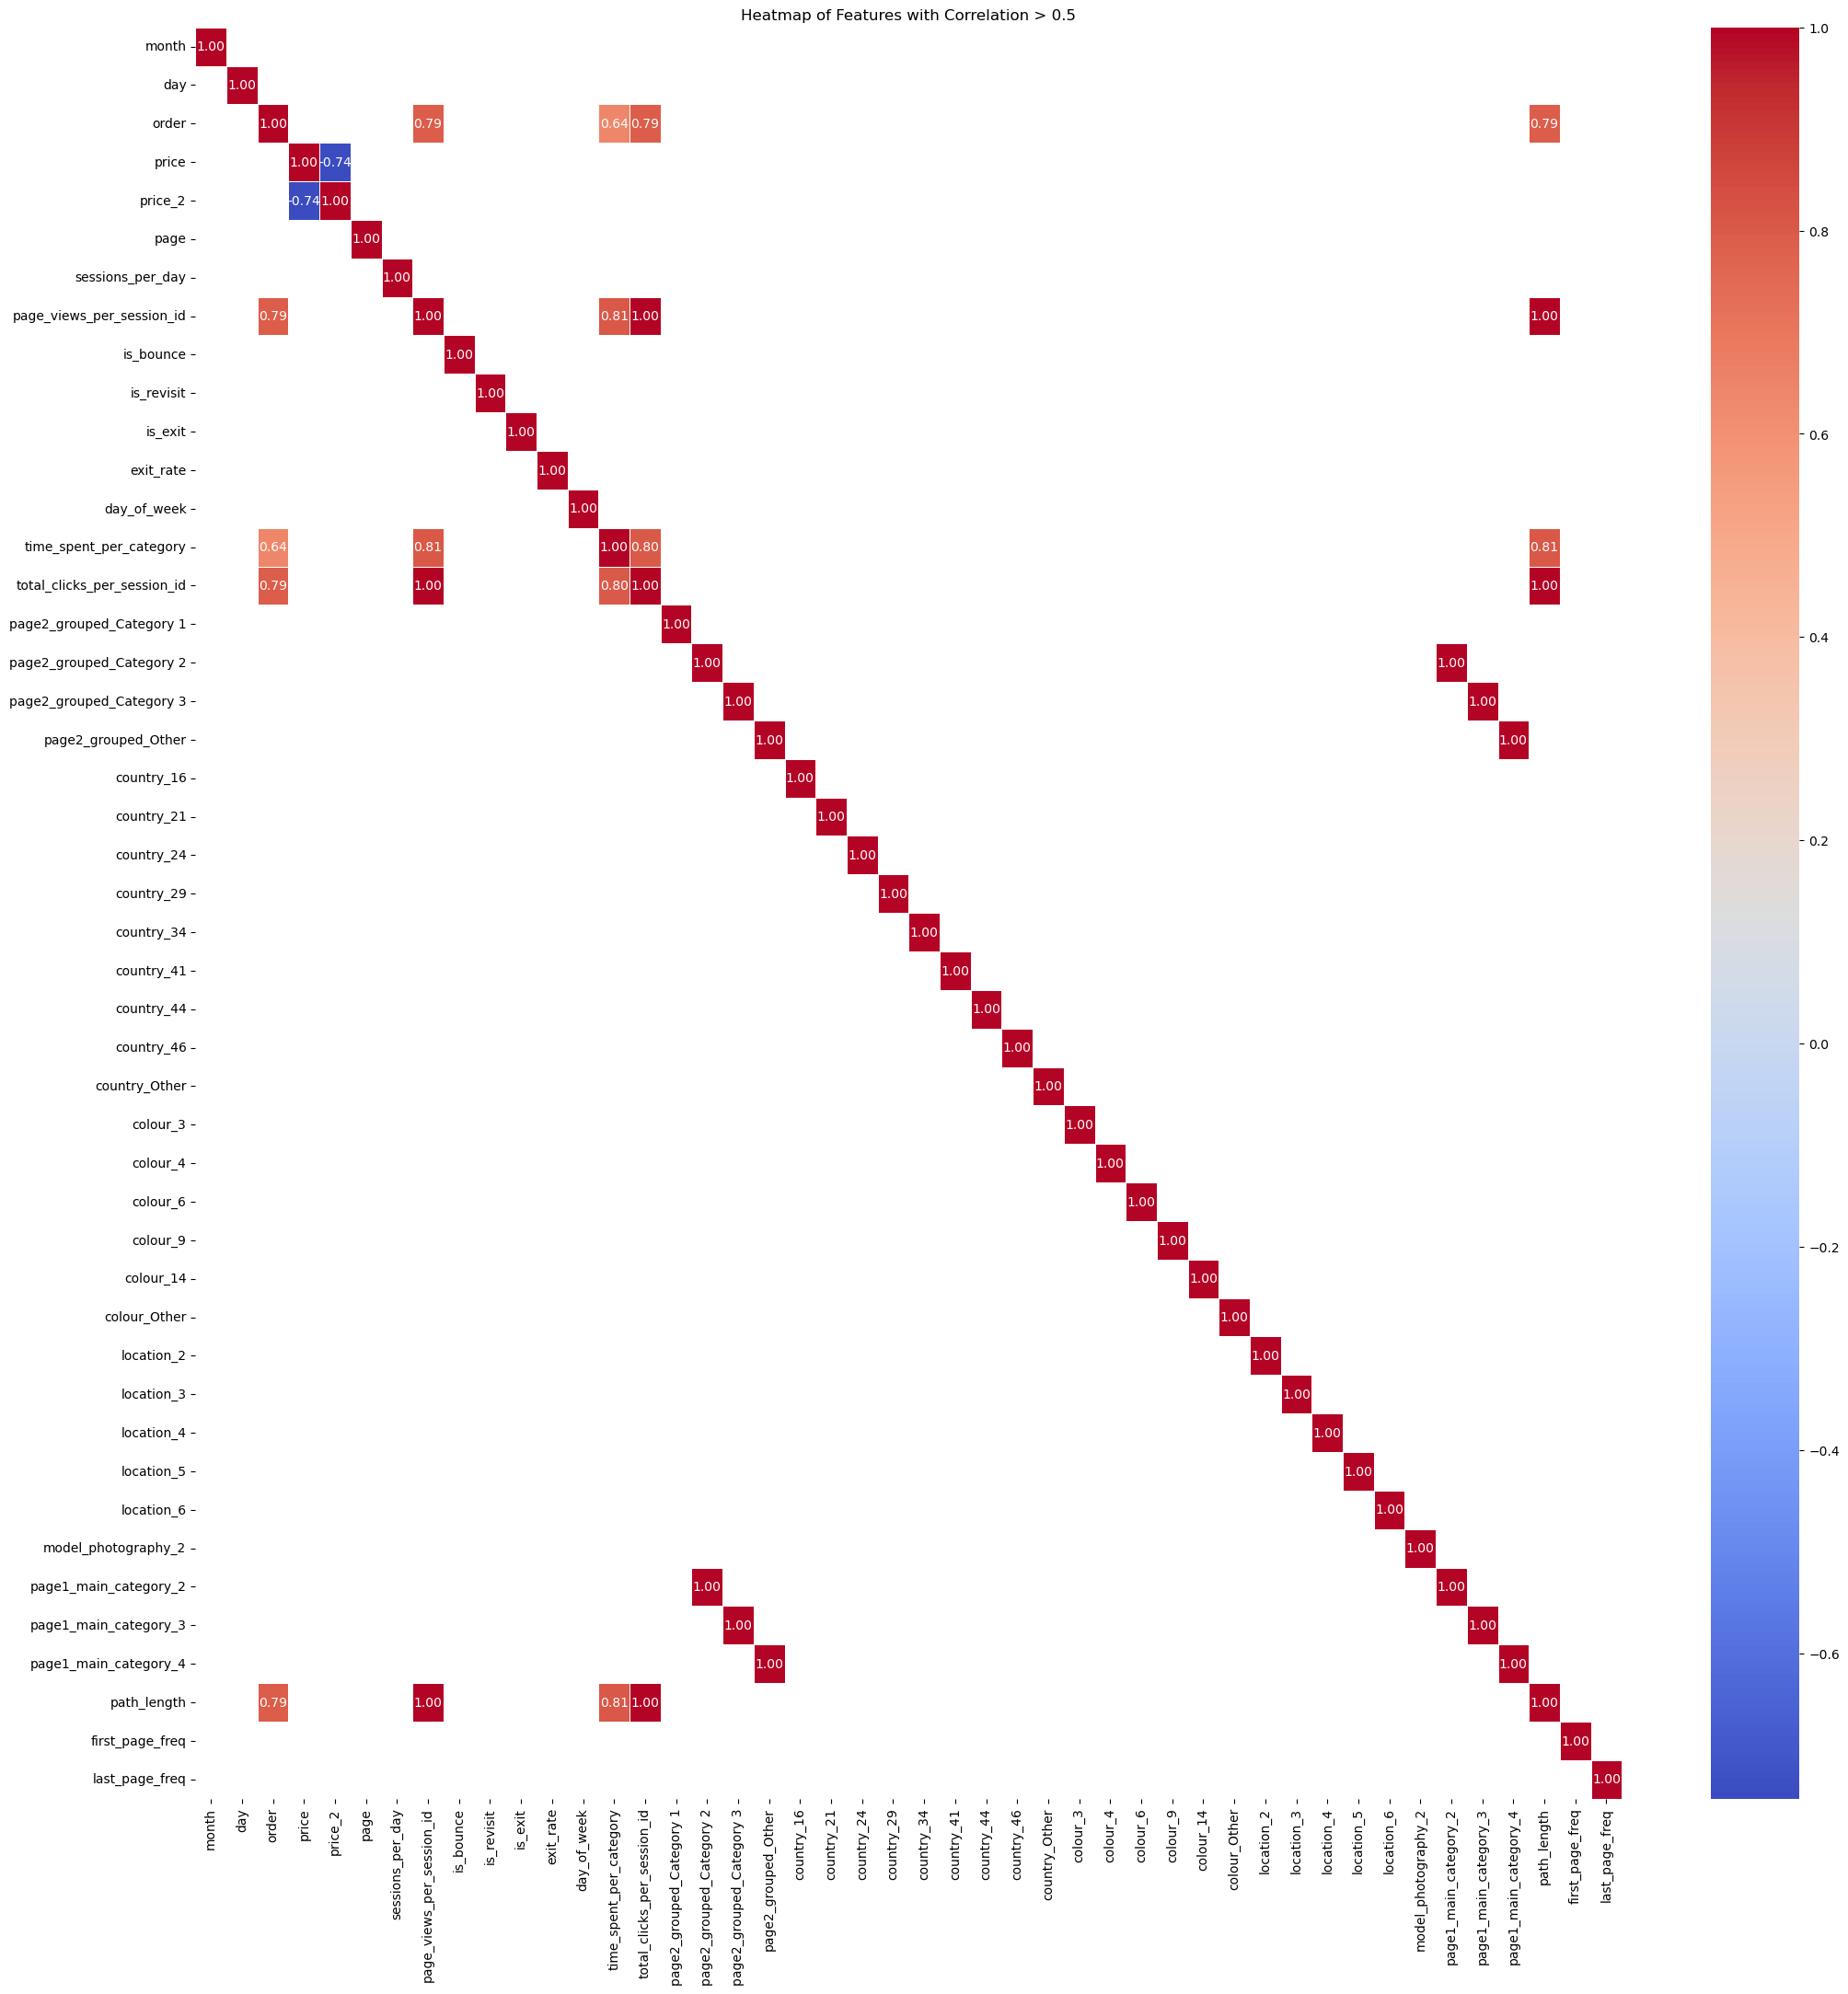

In [12]:
threshold = 0.5

corr_matrix = df_final.corr()

mask = np.abs(corr_matrix) < threshold

plt.figure(figsize=(25,25))

sns.heatmap(corr_matrix, mask = mask, cmap='coolwarm', annot= True, fmt='.2f', linewidths=0.5)
plt.title(f"Heatmap of Features with Correlation > {threshold}")
plt.show()

In [89]:

# Set correlation threshold
threshold = 0.5

# Compute correlation matrix
corr_matrix = df_final.corr()

# Find pairs of features exceeding threshold
high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

# Extract and display the pairs
high_corr_cols = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_cols.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_cols = high_corr_cols.sort_values(by="Correlation", ascending=False)

# Display only highly correlated feature pairs
print(high_corr_cols)


                      Feature 1                    Feature 2  Correlation
18        page1_main_category_2     page2_grouped_Category 2     0.999979
17     page2_grouped_Category 2        page1_main_category_2     0.999979
21                  path_length  total_clicks_per_session_id     0.995234
16  total_clicks_per_session_id                  path_length     0.995234
8     page_views_per_session_id  total_clicks_per_session_id     0.995234
14  total_clicks_per_session_id    page_views_per_session_id     0.995234
12      time_spent_per_category                  path_length     0.805442
20                  path_length      time_spent_per_category     0.805442
7     page_views_per_session_id      time_spent_per_category     0.805442
10      time_spent_per_category    page_views_per_session_id     0.805442
15  total_clicks_per_session_id      time_spent_per_category     0.800812
11      time_spent_per_category  total_clicks_per_session_id     0.800812
13  total_clicks_per_session_id       

In [15]:
df_final = df_final.drop(['page2_grouped_Category 2','total_clicks_per_session_id', 'price','page_views_per_session_id', 'time_spent_per_category'], axis=1)

In [127]:
# Set correlation threshold
threshold = 0.5

# Compute correlation matrix
corr_matrix = df_final.corr()

# Find pairs of features exceeding threshold
high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

# Extract and display the pairs
high_corr_cols = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_cols.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_cols = high_corr_cols.sort_values(by="Correlation", ascending=False)

# Display only highly correlated feature pairs
print(high_corr_cols)

     Feature 1    Feature 2  Correlation
0        order  path_length     0.790185
1  path_length        order     0.790185


In [16]:
df_final.shape

(132379, 41)

In [92]:
# for classification Problem

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [18]:
x = df_final.drop('price_2', axis = 1)
y = df_final['price_2']

In [99]:
mutual_info = mutual_info_classif(x, y)
mutual_info_df_final = pd.DataFrame( data = mutual_info, index= x.columns, columns = ['Mutual Info']).sort_values(by='Mutual Info', ascending = False)
print(mutual_info_df_final)

                          Mutual Info
page2_grouped_Category 1     0.026756
last_page_freq               0.020984
first_page_freq              0.019348
page                         0.018588
is_revisit                   0.014215
page1_main_category_2        0.013508
country_29                   0.013179
colour_6                     0.005544
page2_grouped_Category 3     0.005204
model_photography_2          0.005076
location_4                   0.004869
colour_Other                 0.004102
page1_main_category_4        0.003529
page1_main_category_3        0.003346
month                        0.003332
exit_rate                    0.003048
location_2                   0.002496
day_of_week                  0.002483
colour_3                     0.002405
page2_grouped_Other          0.002366
location_5                   0.002034
country_44                   0.001858
country_Other                0.001455
colour_4                     0.001354
country_16                   0.001232
is_bounce   

In [19]:
#SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [11]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
x.shape

(132379, 40)

In [24]:
classifier = RandomForestClassifier(n_estimators=50,n_jobs=-1)

sfs_classif = SFS(estimator  = classifier,
                    k_features=30,
                    forward = True,
                    scoring='accuracy',
                    floating = False,
                    cv=5,
                    n_jobs= -1,
                    verbose=2)
                  
sfs_classif.fit(x_train, y_train)

# Get selected features
selected_features_class = list(sfs_classif.k_feature_names_)
print("Selected Features for Classification:", selected_features_class)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  1.7min remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.7min finished

[2025-02-08 13:08:18] Features: 1/30 -- score: 0.606831058112556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:  1.5min remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  1.7min finished

[2025-02-08 13:10:02] Features: 2/30 -- score: 0.6450331840500728[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:  1.8min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:  2.0min finished

[2025-02-08 13:12:04] Features: 3/30 -- score: 0.6820050720336697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 

Selected Features for Classification: ['order', 'page', 'is_bounce', 'exit_rate', 'page2_grouped_Category 1', 'page2_grouped_Category 3', 'page2_grouped_Other', 'country_21', 'country_24', 'country_29', 'country_41', 'country_44', 'colour_3', 'colour_4', 'colour_6', 'colour_9', 'colour_14', 'colour_Other', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6', 'model_photography_2', 'page1_main_category_2', 'page1_main_category_3', 'page1_main_category_4', 'path_length', 'first_page_freq', 'last_page_freq']


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.4min finished

[2025-02-08 14:31:32] Features: 30/30 -- score: 0.9307613446285006

In [ ]:
# based on the SFS after 23 features score gets decreased. 
# selecting only 23 features.

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

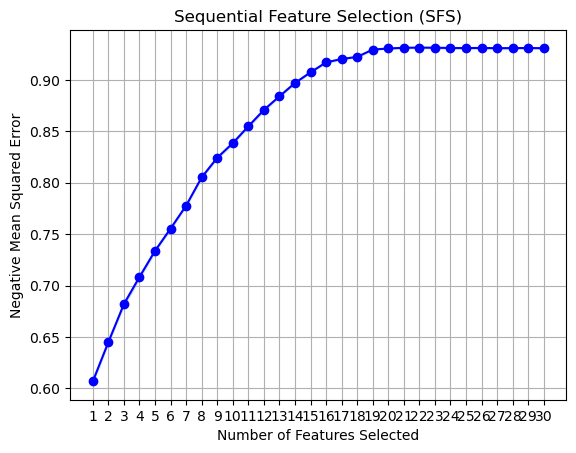

In [26]:
metric_dict = sfs_classif.get_metric_dict()
fig = plot_sfs(metric_dict, kind = 'std_err')

plt.title('Sequential Feature Selection (SFS)')
plt.xlabel('Number of Features Selected')
plt.ylabel('accuracy')
plt.grid()
plt.show()

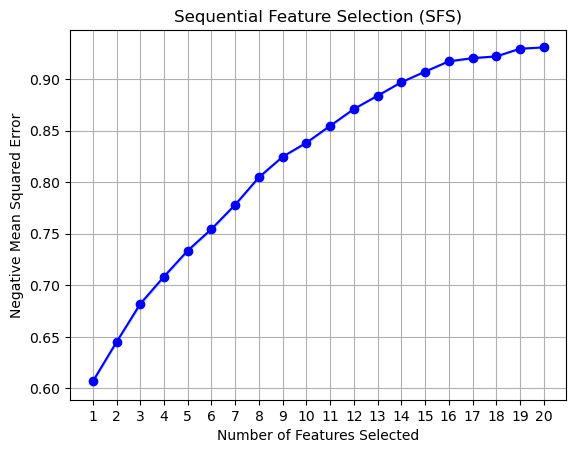

In [107]:
# for 20 features
metric_dict = sfs_classif.get_metric_dict()
fig = plot_sfs(metric_dict, kind = 'std_err')

plt.title('Sequential Feature Selection (SFS)')
plt.xlabel('Number of Features Selected')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
# 23 feature is selected as final for classification models

In [ ]:
# final Selected columns for classification model
x = df_final[['order', 'page', 'is_bounce', 'exit_rate', 'page2_grouped_Category 1', 'page2_grouped_Category 3', 'page2_grouped_Other', 
'country_21', 'country_24', 'country_29', 'country_41', 'country_44', 'colour_3', 'colour_4', 'colour_6', 'colour_9', 'colour_14', 
'colour_Other', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6']]
y = df_final['price_2']

In [3]:
df = df_final[['order', 'page', 'is_bounce', 'exit_rate', 'page2_grouped_Category 1', 'page2_grouped_Category 3', 'page2_grouped_Other', 
'country_21', 'country_24', 'country_29', 'country_41', 'country_44', 'colour_3', 'colour_4', 'colour_6', 'colour_9', 'colour_14', 
'colour_Other', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6','price_2']]

In [ ]:
df.to_csv('Final dataset for classification model.csv', index =False)

      Regression Problem Preprocessing

In [17]:
df_final = pd.read_csv("C:/Users/loges/clickstream/train dataset with feature engineering & encoding.csv")

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
col_to_scale = [
    'order','sessions_per_day', 'page_views_per_session_id', 
    'path_length', 'first_page_freq', 'last_page_freq',
    'exit_rate', 'time_spent_per_category', 'total_clicks_per_session_id']


In [20]:
scaler = StandardScaler()
df_final[col_to_scale] = scaler.fit_transform(df_final[col_to_scale])

In [21]:
df_final.head()

,month,day,order,price,price_2,page,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,...,location_4,location_5,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page_freq,last_page_freq
0,4,1,-0.580383,33,2,1,4.052093,-0.411866,0,1,...,0,0,1,0,0,0,0,-0.411866,-0.34856,3.182581
1,4,1,-0.506083,52,1,1,4.052093,-0.411866,0,1,...,0,0,0,0,1,0,0,-0.411866,-0.34856,3.182581
2,4,1,-0.431783,38,2,1,4.052093,-0.411866,0,1,...,0,0,1,1,1,0,0,-0.411866,-0.34856,3.182581
3,4,1,-0.357482,52,1,1,4.052093,-0.411866,0,0,...,0,0,0,1,1,0,0,-0.411866,-0.34856,3.182581
4,4,1,-0.283182,57,1,4,4.052093,-0.411866,0,1,...,0,0,0,1,0,1,0,-0.411866,-0.34856,3.182581


In [22]:
df_final.to_csv('train dataset with Scaled for Regression.csv', index=False)

In [4]:
df_final = pd.read_csv("C:/Users/loges/clickstream/train dataset with Scaled for Regression.csv")

In [5]:
df_final.shape

(132379, 46)

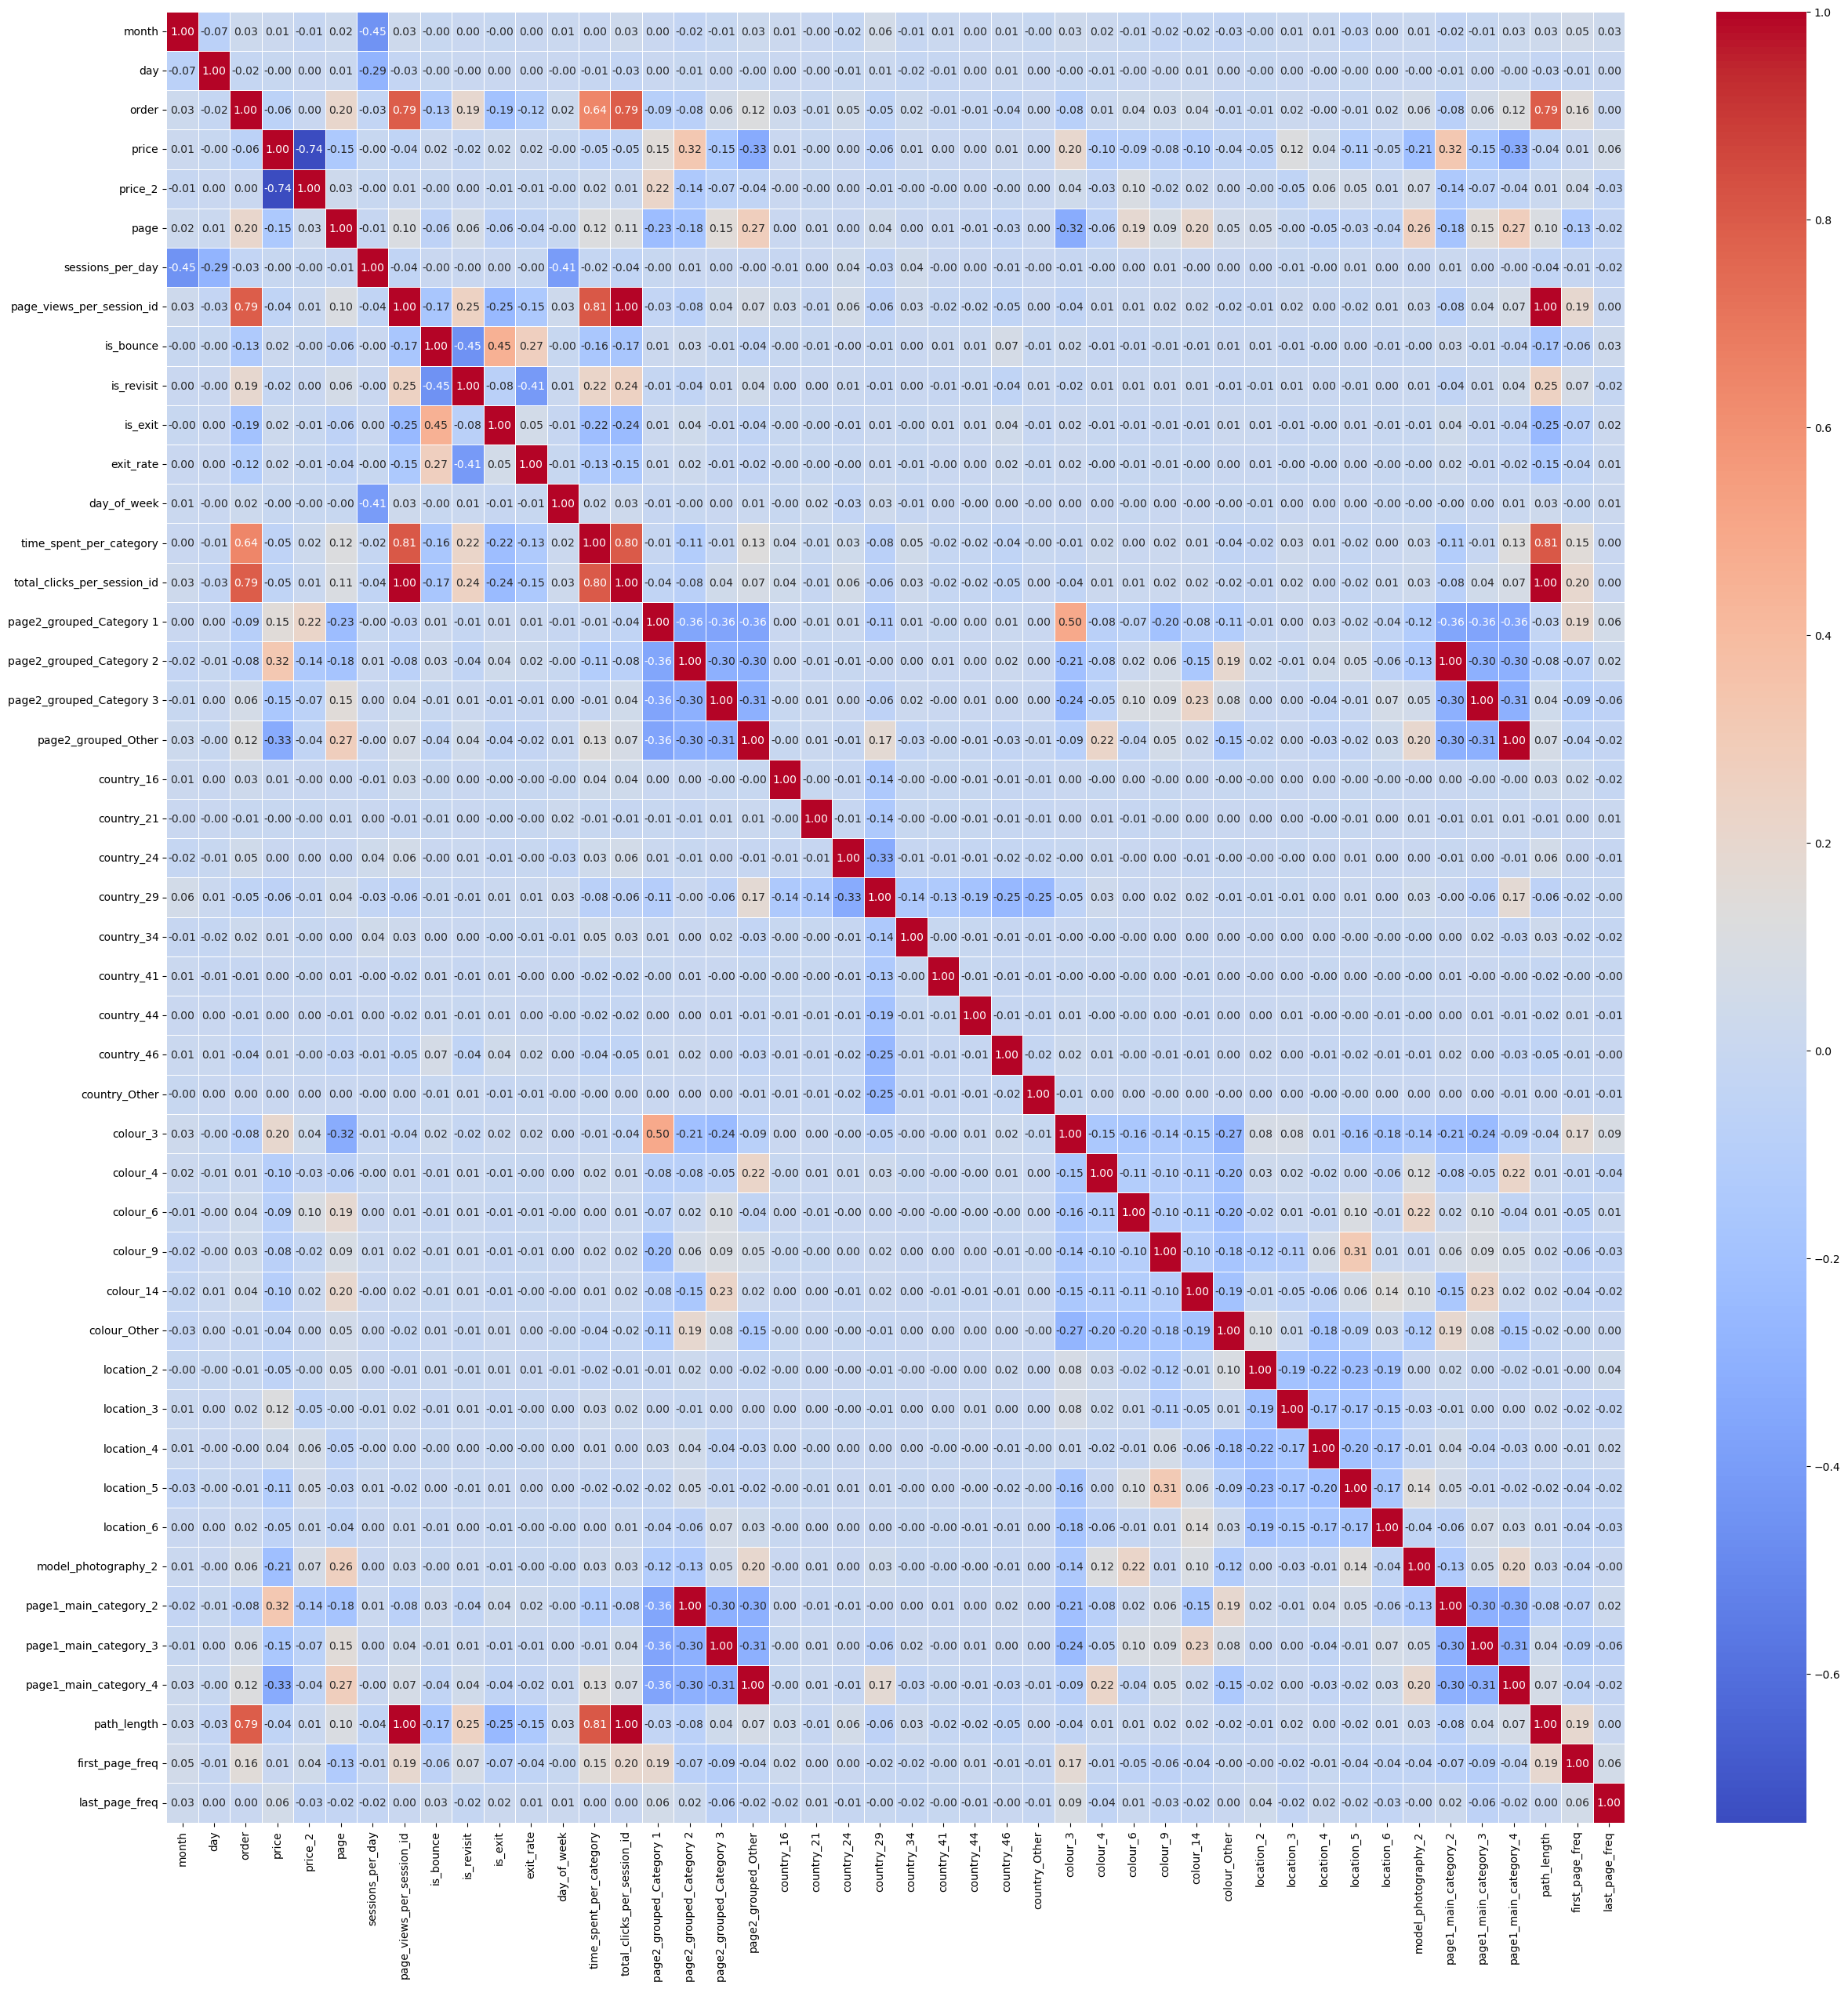

In [10]:
corr = df_final.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

In [17]:
# corr check

threshold = 0.5

corr_matrix = df_final.corr()

high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

high_corr_cols = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_cols.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_cols = high_corr_cols.sort_values(by="Correlation", ascending =False)

print(high_corr_cols)

                      Feature 1                    Feature 2  Correlation
18        page1_main_category_2     page2_grouped_Category 2     0.999979
17     page2_grouped_Category 2        page1_main_category_2     0.999979
21                  path_length  total_clicks_per_session_id     0.995234
16  total_clicks_per_session_id                  path_length     0.995234
8     page_views_per_session_id  total_clicks_per_session_id     0.995234
14  total_clicks_per_session_id    page_views_per_session_id     0.995234
12      time_spent_per_category                  path_length     0.805442
20                  path_length      time_spent_per_category     0.805442
7     page_views_per_session_id      time_spent_per_category     0.805442
10      time_spent_per_category    page_views_per_session_id     0.805442
15  total_clicks_per_session_id      time_spent_per_category     0.800812
11      time_spent_per_category  total_clicks_per_session_id     0.800812
13  total_clicks_per_session_id       

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [19]:
x = df_final.drop(columns=["price"])

x = x.astype(float)

vif_data = pd.DataFrame()
vif_data["features"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

print(vif_data)
            

C:\Users\loges\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       features           VIF
0                         month  1.444254e+00
1                           day  1.200873e+00
2                         order  2.855735e+00
3                       price_2  1.112623e+00
4                          page  1.580394e+00
5              sessions_per_day  1.888134e+00
6     page_views_per_session_id           inf
7                     is_bounce  1.637842e+00
8                    is_revisit  1.520399e+00
9                       is_exit  1.369519e+00
10                    exit_rate  1.223534e+00
11                  day_of_week  1.311479e+00
12      time_spent_per_category  2.974428e+00
13  total_clicks_per_session_id  1.081639e+02
14     page2_grouped_Category 1  2.570924e+01
15     page2_grouped_Category 2  3.060801e+04
16     page2_grouped_Category 3           inf
17          page2_grouped_Other           inf
18                   country_16  1.045433e+00
19                   country_21  1.044050e+00
20                   country_24  1

In [7]:
df_final = df_final.drop(['page2_grouped_Category 3', 'page_views_per_session_id', 'page2_grouped_Other',
                     'page2_grouped_Category 2', 'page1_main_category_4', 'path_length' ], axis=1)

In [22]:
x = df_final.drop(columns=["price"])

x = x.astype(float)

vif_data = pd.DataFrame()
vif_data["features"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

print(vif_data.sort_values(by = 'VIF', ascending = False))

                       features        VIF
0                         month  16.640577
3                       price_2  10.056292
17                   country_29   8.163437
7                    is_revisit   8.036003
4                          page   5.862758
12  total_clicks_per_session_id   4.683776
1                           day   3.854702
10                  day_of_week   3.428873
13     page2_grouped_Category 1   3.064697
11      time_spent_per_category   2.906558
2                         order   2.854627
28                 colour_Other   2.731120
23                     colour_3   2.569950
35        page1_main_category_2   2.391688
36        page1_main_category_3   2.251032
32                   location_5   2.241593
31                   location_4   1.978218
29                   location_2   1.948694
25                     colour_6   1.841331
27                    colour_14   1.799379
33                   location_6   1.758278
26                     colour_9   1.724149
6          

In [24]:
# corr check

threshold = 0.5

corr_matrix = df_final.corr()

high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

high_corr_cols = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_cols.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_cols = high_corr_cols.sort_values(by="Correlation", ascending =False)

print(high_corr_cols)

                     Feature 1                    Feature 2  Correlation
5      time_spent_per_category  total_clicks_per_session_id     0.800812
7  total_clicks_per_session_id      time_spent_per_category     0.800812
1                        order  total_clicks_per_session_id     0.794537
6  total_clicks_per_session_id                        order     0.794537
0                        order      time_spent_per_category     0.642932
4      time_spent_per_category                        order     0.642932
2                        price                      price_2    -0.743123
3                      price_2                        price    -0.743123


In [8]:
#df_final = df_final.drop(['total_clicks_per_session_id', 'time_spent_per_category'], axis = 1)
df_final = df_final.drop(['price_2', 'total_clicks_per_session_id' ], axis = 1)

In [26]:
# corr check

threshold = 0.5

corr_matrix = df_final.corr()

high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

high_corr_cols = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_cols.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_cols = high_corr_cols.sort_values(by="Correlation", ascending =False)

print(high_corr_cols)

                 Feature 1                Feature 2  Correlation
0                    order  time_spent_per_category     0.642932
1  time_spent_per_category                    order     0.642932


In [27]:
x = df_final.drop(['price'], axis = 1)
y = df_final['price']

In [28]:
from sklearn.feature_selection import mutual_info_regression

In [29]:
mutual_info = mutual_info_regression(x, y)
mutual_info_df_final = pd.DataFrame(mutual_info, index = x.columns, columns = ['MUtual Information'])
print(mutual_info_df_final)

                          MUtual Information
month                               0.002960
day                                 0.001709
order                               0.007506
page                                0.163523
sessions_per_day                    0.000000
is_bounce                           0.003739
is_revisit                          0.001344
is_exit                             0.002917
exit_rate                           0.003087
day_of_week                         0.000000
time_spent_per_category             0.015272
page2_grouped_Category 1            0.182994
country_16                          0.000000
country_21                          0.002850
country_24                          0.000000
country_29                          0.004235
country_34                          0.000000
country_41                          0.000000
country_44                          0.003028
country_46                          0.000738
country_Other                       0.001743
colour_3  

In [14]:
df_final.shape

(132379, 38)

In [15]:
df_final.columns

Index(['month', 'day', 'order', 'price', 'page', 'sessions_per_day',
       'is_bounce', 'is_revisit', 'is_exit', 'exit_rate', 'day_of_week',
       'time_spent_per_category', 'page2_grouped_Category 1', 'country_16',
       'country_21', 'country_24', 'country_29', 'country_34', 'country_41',
       'country_44', 'country_46', 'country_Other', 'colour_3', 'colour_4',
       'colour_6', 'colour_9', 'colour_14', 'colour_Other', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6',
       'model_photography_2', 'page1_main_category_2', 'page1_main_category_3',
       'first_page_freq', 'last_page_freq'],
      dtype='object')

In [13]:
x = df_final.drop(['price'], axis = 1)
y = df_final['price']

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [18]:
from lightgbm import LGBMRegressor

In [19]:
# Checking Run 23/02

regression = LGBMRegressor()

sfs_regressor = SFS(estimator  = regression,
                    k_features=25,
                    forward = True,
                    scoring='r2',
                    floating = True,
                    cv=5,
                    n_jobs= -1,
                    verbose=2)
                  
sfs_regressor.fit(x_train, y_train)

# Get selected features
selected_features_class = list(sfs_regressor.k_feature_names_)
print("Selected Features for Regression:", selected_features_class)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:   13.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   13.8s finished

[2025-02-23 19:18:42] Features: 1/25 -- score: 0.10405016685760168[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:   12.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.7s finished

[2025-02-23 19:18:56] Features: 2/25 -- score: 0.18641114370667042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:   11.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s finished

[2025-02-23 19:19:10] Features

Selected Features for Regression: ['order', 'page', 'page2_grouped_Category 1', 'country_21', 'country_24', 'country_34', 'country_44', 'country_46', 'country_Other', 'colour_3', 'colour_4', 'colour_6', 'colour_9', 'colour_14', 'colour_Other', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6', 'model_photography_2', 'page1_main_category_2', 'page1_main_category_3', 'first_page_freq', 'last_page_freq']


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   18.1s finished

[2025-02-23 19:28:01] Features: 25/25 -- score: 0.8132271709313219

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

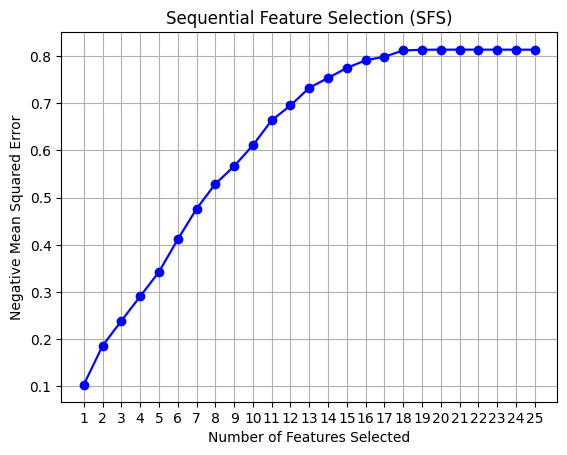

In [21]:
fig = plot_sfs(sfs_regressor.get_metric_dict(), kind='std_err')

plt.title('Sequential Feature Selection (SFS)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Negative Mean Squared Error')
plt.grid()
plt.show()

In [22]:
# Get detailed metrics for all subsets
metric_dict = sfs_regressor.get_metric_dict()
metric_dict

{1: {'feature_idx': (33,),
  'cv_scores': array([0.10499275, 0.10201283, 0.10394401, 0.1063923 , 0.10290895]),
  'avg_score': np.float64(0.10405016685760168),
  'feature_names': ('page1_main_category_2',),
  'ci_bound': np.float64(0.001977717635506189),
  'std_dev': np.float64(0.0015387315105777448),
  'std_err': np.float64(0.0007693657552888724)},
 2: {'feature_idx': (11, 33),
  'cv_scores': array([0.18472247, 0.18525439, 0.18987887, 0.18543505, 0.18676493]),
  'avg_score': np.float64(0.18641114370667042),
  'feature_names': ('page2_grouped_Category 1', 'page1_main_category_2'),
  'ci_bound': np.float64(0.0023902790420953454),
  'std_dev': np.float64(0.0018597183010932332),
  'std_err': np.float64(0.0009298591505466166)},
 3: {'feature_idx': (11, 21, 33),
  'cv_scores': array([0.2351631 , 0.23562823, 0.2394729 , 0.24217524, 0.24401787]),
  'avg_score': np.float64(0.23929146716387334),
  'feature_names': ('page2_grouped_Category 1',
   'colour_3',
   'page1_main_category_2'),
  'ci_bou

In [29]:
col = ['order',
   'page',
   'page2_grouped_Category 1',
   'country_24',
   'country_44',
   'colour_3',
   'colour_4',
   'colour_6',
   'colour_9',
   'colour_14',
   'colour_Other',
   'location_2',
   'location_3',
   'location_4',
   'location_5',
   'location_6',
   'model_photography_2',
   'page1_main_category_2',
   'page1_main_category_3',
   'first_page_freq',
   'last_page_freq',
   'price']

In [30]:
final_df = df_final[col]

In [31]:
final_df.shape

(132379, 22)

In [32]:
final_df.columns

Index(['order', 'page', 'page2_grouped_Category 1', 'country_24', 'country_44',
       'colour_3', 'colour_4', 'colour_6', 'colour_9', 'colour_14',
       'colour_Other', 'location_2', 'location_3', 'location_4', 'location_5',
       'location_6', 'model_photography_2', 'page1_main_category_2',
       'page1_main_category_3', 'first_page_freq', 'last_page_freq', 'price'],
      dtype='object')

In [33]:
final_df.to_csv("Final dataset for Regression model.csv", index=False)